# Latar Belakang

Tim Marketing meminta tim Data Science di Perusahaan Supermarket X untuk melakukan analisa terhadap data yang dimiliki. Nantinya tim Data Science diminta untuk menganalisa beberapa aspek seperti customer behaviour sampai dengan campaign effectiveness. Tim Data Scince juga diminta untuk memberikan rekomendasi yang muncul dari data tersebut bila dimungkinkan.


# Rumusan Masalah

Tim Data Scince diminta untuk melakukan analisa sebagai berikut.

1. Demografi pelanggan
2. Hubungan antara produk yang dibeli (Meats) terhadap variabel Education, Total Children Age, Income dan Marital Status
3. Analisis Campaign yang dilakukan

# Data Science's To Do

Dari permintaan Tim Marketing di atas, tim Data Science harus memastikan data yang diberikan layak digunakan agar kesimpulan serta rekomendasinya dapat dinyatakan valid. Data yang diberikan tim Marketing dapat di unduh [di sini](https://drive.google.com/drive/folders/1WodnBbuYTvsF0-6HTuQABQ0KCS31lqbK).


# Import Modul dan Load Data

In [266]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
!pip install plotly
import plotly.express as px
import re
import statsmodels.api as sm
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind

import warnings
warnings.filterwarnings("ignore")


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [267]:
df = pd.read_csv('raw Supermarket Customers.csv', sep = '\t')
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0


## Overview Data 

In [268]:
display(df.head(),df.tail())

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0
2239,9405,1954,PhD,Married,52869.0,1,1,15-10-2012,40,84,3,61,2,1,21,3,3,1,4,7,0,0,0,0,0,0,3,11,1


# Data Understanding, Cleaning dan Exploration

## Understanding
Dari data mentah ini, terdapat informasi sebagai berikut.

Supermarket Customers Data Dictionary

1. People
* ID: Customer's unique identifier
* Year_Birth: Customer's birth year
* Education: Customer's education level
* Marital_Status: Customer's marital status
* Income: Customer's yearly household income
* Kidhome: Number of children in customer's household
* Teenhome: Number of teenagers in customer's household
* Dt_Customer: Date of customer's enrollment with the company
* Recency: Number of days since customer's last purchase
* Complain: 1 if the customer complained in the last 2 years, 0 otherwise

2. Products
* MntWines: Amount spent on wine in last 2 years
* MntFruits: Amount spent on fruits in last 2 years
* MntMeatProducts: Amount spent on meat in last 2 years
* MntFishProducts: Amount spent on fish in last 2 years
* MntSweetProducts: Amount spent on sweets in last 2 years
* MntGoldProds: Amount spent on gold in last 2 years

3. Promotion
* NumDealsPurchases: Number of purchases made with a discount
* AcceptedCmp1: 1 if the customer accepted the offer in the 1st campaign, 0 otherwise
* AcceptedCmp2: 1 if the customer accepted the offer in the 2nd campaign, 0 otherwise
* AcceptedCmp3: 1 if the customer accepted the offer in the 3rd campaign, 0 otherwise
* AcceptedCmp4: 1 if the customer accepted the offer in the 4th campaign, 0 otherwise
* AcceptedCmp5: 1 if the customer accepted the offer in the 5th campaign, 0 otherwise
* Response: 1 if the customer accepted the offer in the last campaign, 0 otherwise

4. Place
* NumWebPurchases: Number of purchases made through the company’s website
* NumCatalogPurchases: Number of purchases made using a catalog
* NumStorePurchases: Number of purchases made directly in stores
* NumWebVisitsMonth: Number of visits to the company’s website in the last month

Dari informasi diatas, kita dapat melanjutkan tahap Cleaning untuk memastikan data yang digunakan sesuai dengan rumusan masalah yang kita miliki.

## Cleaning

### Overview Data

#### Info dan Describe

In [269]:
pd.set_option('display.max_columns', None)
display(df.info(),df.describe(), df.describe(include='object'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

None

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


,Education,Marital_Status,Dt_Customer
count,2240,2240,2240
unique,5,8,663
top,Graduation,Married,31-08-2012
freq,1127,864,12


#### Uniqe Value

In [270]:
pd.set_option('display.max_colwidth', None)
# data uni di tiap kolom
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

data_uniq = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
data_uniq

,Column Name,Number of Unique,Unique Sample
0,ID,2240,"[5524, 2174, 4141, 6182, 5324, 7446, 965, 6177, 4855, 5899, 1994, 387, 2125, 8180, 2569, 2114, 9736, 4939, 6565, 2278, 9360, 5376, 1993, 4047, 1409, 7892, 2404, 5255, 9422, 1966, 6864, 3033, 5710, 7373, 8755, 10738, 4339, 10755, 8595, 2968, 8601, 503, 8430, 7281, 2139, 1371, 9909, 7286, 7244, 6566, 8614, 4114, 1331, 2225, 9381, 6260, 10383, 7437, 8557, 8375, 6853, 3076, 1012, 6518, 4137, 8082, 1386, 9369, 4477, 1357, 1402, 10629, 6312, 8132, 1050, 5846, 1859, 7503, 10401, 1618, 3332, 2261, 5346, 4119, 535, 5268, 273, 4452, 8504, 771, 8996, 9235, 5798, 11178, 2230, 7516, 7247, 11100, 4646, 3037, ...]"
1,Year_Birth,59,"[1957, 1954, 1965, 1984, 1981, 1967, 1971, 1985, 1974, 1950, 1983, 1976, 1959, 1952, 1987, 1946, 1980, 1949, 1982, 1979, 1951, 1969, 1986, 1989, 1963, 1970, 1973, 1943, 1975, 1996, 1968, 1964, 1977, 1978, 1955, 1966, 1988, 1948, 1958, 1972, 1960, 1945, 1991, 1962, 1953, 1961, 1956, 1992, 1900, 1893, 1990, 1947, 1899, 1993, 1994, 1941, 1944, 1995, 1940]"
2,Education,5,"[Graduation, PhD, Master, Basic, 2n Cycle]"
3,Marital_Status,8,"[Single, Together, Married, Divorced, Widow, Alone, Absurd, YOLO]"
4,Income,1974,"[58138.0, 46344.0, 71613.0, 26646.0, 58293.0, 62513.0, 55635.0, 33454.0, 30351.0, 5648.0, nan, 7500.0, 63033.0, 59354.0, 17323.0, 82800.0, 41850.0, 37760.0, 76995.0, 33812.0, 37040.0, 2447.0, 58607.0, 65324.0, 40689.0, 18589.0, 53359.0, 38360.0, 84618.0, 10979.0, 38620.0, 40548.0, 46610.0, 68657.0, 49389.0, 67353.0, 23718.0, 42429.0, 48948.0, 80011.0, 20559.0, 21994.0, 79941.0, 41728.0, 72550.0, 65486.0, 79143.0, 35790.0, 82582.0, 66373.0, 82384.0, 70287.0, 27938.0, 55954.0, 75777.0, 66653.0, 61823.0, 67680.0, 70666.0, 25721.0, 32474.0, 88194.0, 69096.0, 74854.0, 66991.0, 65031.0, 60631.0, 28332.0, 40246.0, 75251.0, 75825.0, 26326.0, 56046.0, 29760.0, 26304.0, 23559.0, 81361.0, 29440.0, 36138.0, 50388.0, 79593.0, 54178.0, 42394.0, 23626.0, 30096.0, 47916.0, 51813.0, 78497.0, 50150.0, 47823.0, 34554.0, 85693.0, 65846.0, 87195.0, 24594.0, 49096.0, 52413.0, 38557.0, 89058.0, 77298.0, ...]"
5,Kidhome,3,"[0, 1, 2]"
6,Teenhome,3,"[0, 1, 2]"
7,Dt_Customer,663,"[04-09-2012, 08-03-2014, 21-08-2013, 10-02-2014, 19-01-2014, 09-09-2013, 13-11-2012, 08-05-2013, 06-06-2013, 13-03-2014, 15-11-2013, 10-10-2012, 24-11-2012, 24-12-2012, 31-08-2012, 28-03-2013, 03-11-2012, 08-08-2012, 06-01-2013, 23-12-2012, 11-01-2014, 18-03-2013, 02-01-2013, 27-05-2013, 20-02-2013, 31-05-2013, 22-11-2013, 22-05-2014, 11-05-2013, 29-10-2012, 29-08-2013, 31-12-2013, 02-09-2013, 11-02-2014, 01-02-2013, 29-04-2013, 12-03-2013, 05-11-2013, 02-10-2013, 28-06-2014, 09-11-2012, 24-05-2013, 01-01-2014, 08-11-2012, 12-05-2014, 11-08-2012, 07-06-2014, 12-06-2013, 19-11-2012, 02-04-2013, 28-04-2014, 17-06-2013, 03-03-2014, 04-07-2013, 07-09-2012, 18-02-2013, 11-06-2013, 06-12-2013, 21-05-2013, 11-05-2014, 19-03-2014, 27-09-2013, 08-04-2013, 11-09-2012, 14-09-2012, 17-03-2013, 05-04-2013, 30-04-2014, 19-12-2012, 27-08-2012, 12-10-2012, 04-09-2013, 29-08-2012, 23-06-2013, 03-07-2013, 25-02-2014, 11-08-2013, 16-07-2013, 28-05-2014, 21-01-2014, 27-05-2014, 23-11-2013, 23-03-2014, 24-05-2014, 22-11-2012, 11-04-2013, 01-12-2013, 20-06-2013, 23-07-2013, 30-03-2014, 20-04-2013, 17-05-2013, 08-05-2014, 10-12-2013, 24-09-2013, 02-02-2013, 07-12-2012, 02-11-2013, 10-11-2012, 25-06-2014, ...]"
8,Recency,100,"[58, 38, 26, 94, 16, 34, 32, 19, 68, 11, 59, 82, 53, 23, 51, 20, 91, 86, 41, 42, 63, 0, 69, 89, 4, 96, 56, 31, 8, 55, 37, 76, 99, 3, 88, 80, 72, 24, 92, 39, 29, 2, 54, 57, 30, 12, 18, 75, 90, 1, 25, 40, 9, 87, 5, 95, 48, 70, 79, 45, 84, 44, 43, 35, 15, 17, 46, 27, 74, 85, 65, 13, 83, 10, 21, 61, 73, 47, 36, 49, 28, 64, 98, 78, 77, 81, 14, 52, 93, 50, 60, 66, 97, 62, 6, 33, 67, 22, 71, 7]"
9,MntWines,776,"[635, 11, 426, 173, 520, 235, 76, 14, 28, 5, 6, 194, 233, 3, 1006, 53, 84, 1012, 4, 86, 1, 867, 384, 270, 36, 684, 8, 112, 110, 96, 482, 40, 702, 55, 437, 421, 13, 9, 81, 123, 48, 826, 245, 650, 12, 510, 3

#### Missing Value

In [271]:
df.isnull().sum()/len(df) * 100

ID                     0.000000
Year_Birth             0.000000
Education              0.000000
Marital_Status         0.000000
Income                 1.071429
Kidhome                0.000000
Teenhome               0.000000
Dt_Customer            0.000000
Recency                0.000000
MntWines               0.000000
MntFruits              0.000000
MntMeatProducts        0.000000
MntFishProducts        0.000000
MntSweetProducts       0.000000
MntGoldProds           0.000000
NumDealsPurchases      0.000000
NumWebPurchases        0.000000
NumCatalogPurchases    0.000000
NumStorePurchases      0.000000
NumWebVisitsMonth      0.000000
AcceptedCmp3           0.000000
AcceptedCmp4           0.000000
AcceptedCmp5           0.000000
AcceptedCmp1           0.000000
AcceptedCmp2           0.000000
Complain               0.000000
Z_CostContact          0.000000
Z_Revenue              0.000000
Response               0.000000
dtype: float64

Dari raw data ini, terdapat informasi sebagai berikut.

1. Data ini memiliki 29 kolom dan 2240 baris
2. Terdapat missing value sebesar 1.07% pada kolom `Income` yang perlu diperhatikan lebih lanjut.
3. Kolom `ID` berupa Unique dari tiap pelanggan dapat di hapus dan kolom `Z_CostContact` dan `Z_Revenue` karena tidak akan memiliki pengaruh terhadap analisa yang kita lakukan.
4. Secara _basic knowledge_, data ini menginformasikan data personal pelanggan, produk yang mereka beli, platform yang mereka gunakan untuk pembelian, campaign yang diterima oleh pelanggan, serta komplain yang dilakukan pelanggan.
5. Data secara keseluruhan tidak terlihat terdapat kesalahan pengetikan.
6. Beberapa data numerikal seperti `Age`  dan `Income` dapat dijadikan data kategorik ordinal untuk mempermudah menganalisia demografi pelanggan.
7. Untuk mengetahui adanya Outlier, data perlu dipelajari lebih lanjut.
8. Dapat dilakukan Replace value pada `Education` dan `Marital Status` untuk membuatnya lebih proporsional.
9. Dapat dilakukan Rename kolom pada `Mnt --` menjadi produk yang spesifik untuk mempermudah pemahaman stakeholder.



### Cleaning

#### Drop Kolom

In [272]:
df = df.drop(columns=['ID', 'Z_CostContact', 'Z_Revenue'])
df

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1
1,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0
2,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0
3,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0
4,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,0
2236,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,0
2237,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,0
2238,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,0


#### Handle Missing Value

<Axes: >

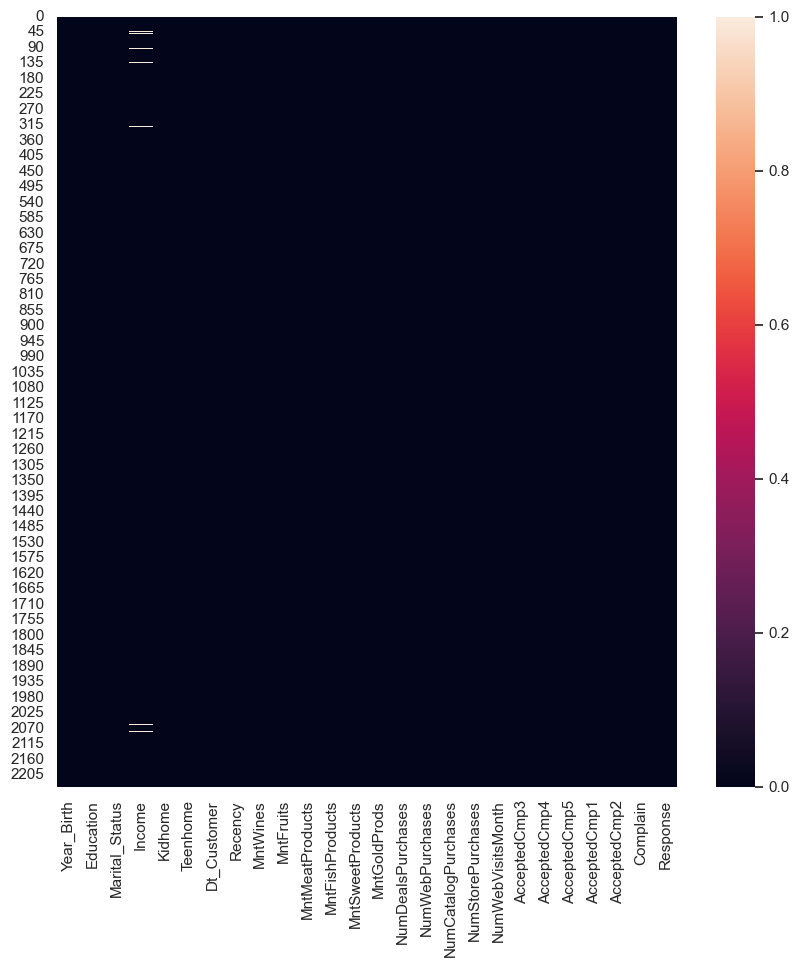

In [273]:
# Melihat sebaran missing value pada data
plt.figure(figsize=(10,10))
sns.heatmap(df.isna())

In [274]:
df[df.isna().any(axis=1)]

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
10,1983,Graduation,Married,NaN,1,0,15-11-2013,11,5,5,6,0,2,1,1,1,0,2,7,0,0,0,0,0,0,0
27,1986,Graduation,Single,NaN,1,0,20-02-2013,19,5,1,3,3,263,362,0,27,0,0,1,0,0,0,0,0,0,0
43,1959,PhD,Single,NaN,0,0,05-11-2013,80,81,11,50,3,2,39,1,1,3,4,2,0,0,0,0,0,0,0
48,1951,Graduation,Single,NaN,2,1,01-01-2014,96,48,5,48,6,10,7,3,2,1,4,6,0,0,0,0,0,0,0
58,1982,Graduation,Single,NaN,1,0,17-06-2013,57,11,3,22,2,2,6,2,2,0,3,6,0,0,0,0,0,0,0
71,1973,2n Cycle,Married,NaN,1,0,14-09-2012,25,25,3,43,17,4,17,3,3,0,3,8,0,0,0,0,0,0,0
90,1957,PhD,Married,NaN,2,1,19-11-2012,4,230,42,192,49,37,53,12,7,2,8,9,0,0,0,0,0,0,0
91,1957,Graduation,Single,NaN,1,1,27-05-2014,45,7,0,8,2,0,1,1,1,0,2,7,0,0,0,0,0,0,0
92,1973,Master,Together,NaN,0,0,23-11-2013,87,445,37,359,98,28,18,1,2,4,8,1,0,0,0,0,0,0,0
128,1961,PhD,Married,NaN,0,1,11-07-2013,23,352,0,27,10,0,15,3,6,1,7,6,0,0,0,0,0,0,0


In [275]:
df

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1
1,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0
2,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0
3,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0
4,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,0
2236,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,0
2237,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,0
2238,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,0


Dikarenakan persentase missing value pada `Income` hanya 1,07%, maka akan lebih baik data dapat dihapus karena tidak memiliki pengaruh signifikan terhadap analisa.

In [276]:
df.dropna(subset=['Income'], inplace=True)
df

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1
1,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0
2,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0
3,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0
4,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,0
2236,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,0
2237,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,0
2238,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,0


## Exploration Data

Kita akan memastikan data yang kita punya sudah menyesuaikan dengan apa yang akan kita analisa. Kita akan melakukan Grouping, Replace, Rename, serta memastikan Anomali

### Grouping Data


#### Age
Pada kondisi ini kita dalam melakukan pengelompokkan umur yang didasari pada rentang seperti berikut.
1. Silent Generation: >= 79 tahun ke atas 
2. Baby Boomers: 59-78 tahun 
3. Gen-X: 44-58 tahun 
4. Millennials: 27-43 tahun
5. Gen-Z: 12-26 tahun
6. Alpha Generation: 0-11 tahun

Nilai `Age` customer bisa dihitung berdasarkan tahun saat ini dikurangin nilai `Year_Birth`

In [277]:
df['Age'] = 2024 - df['Year_Birth']
a = df.pop('Age')
df.insert(df.columns.get_loc('Year_Birth') + 1, 'Age', a)
df

,Year_Birth,Age,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,1957,67,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1
1,1954,70,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0
2,1965,59,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0
3,1984,40,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0
4,1981,43,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,57,Graduation,Married,61223.0,0,1,13-06-2013,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,0
2236,1946,78,PhD,Together,64014.0,2,1,10-06-2014,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,0
2237,1981,43,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,0
2238,1956,68,Master,Together,69245.0,0,1,24-01-2014,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,0


In [278]:
# Membuat kategori `Age Category`
def categorize_age(age):
    if age >= 79:
        return 'Silent Generation'
    elif age >= 59 and age <= 78:
        return 'Baby Boomer'
    elif age >= 44 and age <= 58:
        return 'Generation X'
    elif age >= 27 and age <= 43:
        return 'Millennial'
    elif age >= 12 and age <= 26:
        return 'Generation Z'
    elif age >= 0 and age <= 11:
        return 'Alpha Generation'
    else:
        return 'ada yang salah'

# Mengaplikasikan fungsi untuk membuat kolom kategori
df['Age Category'] = df['Age'].apply(categorize_age)
a = df.pop('Age Category')
df.insert(df.columns.get_loc('Age') + 1, 'Age Category', a)
display(df.info(),df,df['Age Category'].unique())

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           2216 non-null   int64  
 1   Age                  2216 non-null   int64  
 2   Age Category         2216 non-null   object 
 3   Education            2216 non-null   object 
 4   Marital_Status       2216 non-null   object 
 5   Income               2216 non-null   float64
 6   Kidhome              2216 non-null   int64  
 7   Teenhome             2216 non-null   int64  
 8   Dt_Customer          2216 non-null   object 
 9   Recency              2216 non-null   int64  
 10  MntWines             2216 non-null   int64  
 11  MntFruits            2216 non-null   int64  
 12  MntMeatProducts      2216 non-null   int64  
 13  MntFishProducts      2216 non-null   int64  
 14  MntSweetProducts     2216 non-null   int64  
 15  MntGoldProds         2216 non-null   int64 

None

,Year_Birth,Age,Age Category,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,1957,67,Baby Boomer,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1
1,1954,70,Baby Boomer,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0
2,1965,59,Baby Boomer,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0
3,1984,40,Millennial,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0
4,1981,43,Millennial,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,57,Generation X,Graduation,Married,61223.0,0,1,13-06-2013,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,0
2236,1946,78,Baby Boomer,PhD,Together,64014.0,2,1,10-06-2014,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,0
2237,1981,43,Millennial,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,0
2238,1956,68,Baby Boomer,Master,Together,69245.0,0,1,24-01-2014,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,0


array(['Baby Boomer', 'Millennial', 'Generation X', 'Silent Generation'],
      dtype=object)

Melakukan drop kolom `Year_Birth` karna sudah memiliki nilai `Age` dan `Age Category`

In [279]:
df.drop(columns='Year_Birth', inplace=True)
df

,Age,Age Category,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,67,Baby Boomer,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1
1,70,Baby Boomer,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0
2,59,Baby Boomer,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0
3,40,Millennial,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0
4,43,Millennial,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,57,Generation X,Graduation,Married,61223.0,0,1,13-06-2013,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,0
2236,78,Baby Boomer,PhD,Together,64014.0,2,1,10-06-2014,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,0
2237,43,Millennial,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,0
2238,68,Baby Boomer,Master,Together,69245.0,0,1,24-01-2014,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,0


#### Income
Membuat `Income Category` berdasarkan `Income` seperti berikut.
1. Low Class: Pendapatan tahunan kurang dari $25,000
2. Lower-Middle Class: Pendapatan tahunan antara $25,000 - $50,000
3. Upper-Middle Class: Pendapatan tahunan antara $50,000 - $100,000
4. High Class: Pendapatan tahunan di atas $100,000

In [280]:
def kategori(Income):
    if Income < 25000:
        return 'Lower Class'
    elif 25000 <= Income < 50000:
        return 'Lower-Middle Class'
    elif 50000 <= Income < 100000:
        return 'Upper-Middle Class'
    else:
        return 'Higher Class'


df['Income Category'] = df['Income'].apply(kategori)
b = df.pop('Income Category')
df.insert(df.columns.get_loc('Income') + 1, 'Income Category', b)
display(df.info(),df,df['Income Category'].unique())

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  2216 non-null   int64  
 1   Age Category         2216 non-null   object 
 2   Education            2216 non-null   object 
 3   Marital_Status       2216 non-null   object 
 4   Income               2216 non-null   float64
 5   Income Category      2216 non-null   object 
 6   Kidhome              2216 non-null   int64  
 7   Teenhome             2216 non-null   int64  
 8   Dt_Customer          2216 non-null   object 
 9   Recency              2216 non-null   int64  
 10  MntWines             2216 non-null   int64  
 11  MntFruits            2216 non-null   int64  
 12  MntMeatProducts      2216 non-null   int64  
 13  MntFishProducts      2216 non-null   int64  
 14  MntSweetProducts     2216 non-null   int64  
 15  MntGoldProds         2216 non-null   int64 

None

,Age,Age Category,Education,Marital_Status,Income,Income Category,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,67,Baby Boomer,Graduation,Single,58138.0,Upper-Middle Class,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1
1,70,Baby Boomer,Graduation,Single,46344.0,Lower-Middle Class,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0
2,59,Baby Boomer,Graduation,Together,71613.0,Upper-Middle Class,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0
3,40,Millennial,Graduation,Together,26646.0,Lower-Middle Class,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0
4,43,Millennial,PhD,Married,58293.0,Upper-Middle Class,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,57,Generation X,Graduation,Married,61223.0,Upper-Middle Class,0,1,13-06-2013,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,0
2236,78,Baby Boomer,PhD,Together,64014.0,Upper-Middle Class,2,1,10-06-2014,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,0
2237,43,Millennial,Graduation,Divorced,56981.0,Upper-Middle Class,0,0,25-01-2014,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,0
2238,68,Baby Boomer,Master,Together,69245.0,Upper-Middle Class,0,1,24-01-2014,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,0


array(['Upper-Middle Class', 'Lower-Middle Class', 'Lower Class',
       'Higher Class'], dtype=object)

#### Year as Cust
Membuat kolom `Year as Cust` berdasarkan kolom `Dt_Customer` untuk memahami pengaruh lamanya menjadi pelanggan Supermarket terhadap efektifitas promo dan campaign pembelian produk Supermarket

In [281]:
from datetime import datetime
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], errors='coerce', format='%d-%m-%Y')

# Mengecek mana yang gagal diubah
invalid = df[df['Dt_Customer'].isna()]

# Tampilkan hasil
print("Tanggal yang gagal diubah:")
print(invalid)

Tanggal yang gagal diubah:
Empty DataFrame
Columns: [Age, Age Category, Education, Marital_Status, Income, Income Category, Kidhome, Teenhome, Dt_Customer, Recency, MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds, NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, NumStorePurchases, NumWebVisitsMonth, AcceptedCmp3, AcceptedCmp4, AcceptedCmp5, AcceptedCmp1, AcceptedCmp2, Complain, Response]
Index: []


In [282]:
current_year = pd.Timestamp.now().year
df['Years as Cust'] = current_year - df['Dt_Customer'].dt.year
c = df.pop('Years as Cust')
df.insert(df.columns.get_loc('Dt_Customer') + 1, 'Years as Cust', c)
display(df.info(),df,df['Years as Cust'].unique())

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Age                  2216 non-null   int64         
 1   Age Category         2216 non-null   object        
 2   Education            2216 non-null   object        
 3   Marital_Status       2216 non-null   object        
 4   Income               2216 non-null   float64       
 5   Income Category      2216 non-null   object        
 6   Kidhome              2216 non-null   int64         
 7   Teenhome             2216 non-null   int64         
 8   Dt_Customer          2216 non-null   datetime64[ns]
 9   Years as Cust        2216 non-null   int32         
 10  Recency              2216 non-null   int64         
 11  MntWines             2216 non-null   int64         
 12  MntFruits            2216 non-null   int64         
 13  MntMeatProducts      2216 non-null   i

None

,Age,Age Category,Education,Marital_Status,Income,Income Category,Kidhome,Teenhome,Dt_Customer,Years as Cust,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,67,Baby Boomer,Graduation,Single,58138.0,Upper-Middle Class,0,0,2012-09-04,12,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1
1,70,Baby Boomer,Graduation,Single,46344.0,Lower-Middle Class,1,1,2014-03-08,10,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0
2,59,Baby Boomer,Graduation,Together,71613.0,Upper-Middle Class,0,0,2013-08-21,11,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0
3,40,Millennial,Graduation,Together,26646.0,Lower-Middle Class,1,0,2014-02-10,10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0
4,43,Millennial,PhD,Married,58293.0,Upper-Middle Class,1,0,2014-01-19,10,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,57,Generation X,Graduation,Married,61223.0,Upper-Middle Class,0,1,2013-06-13,11,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,0
2236,78,Baby Boomer,PhD,Together,64014.0,Upper-Middle Class,2,1,2014-06-10,10,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,0
2237,43,Millennial,Graduation,Divorced,56981.0,Upper-Middle Class,0,0,2014-01-25,10,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,0
2238,68,Baby Boomer,Master,Together,69245.0,Upper-Middle Class,0,1,2014-01-24,10,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,0


array([12, 10, 11], dtype=int32)

Melakukan drop kolom `Dt_Customer` karna sudah tidak relevan terhadap analisa yang dilakukan.

In [283]:
df.drop(columns='Dt_Customer', inplace=True)
df

,Age,Age Category,Education,Marital_Status,Income,Income Category,Kidhome,Teenhome,Years as Cust,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,67,Baby Boomer,Graduation,Single,58138.0,Upper-Middle Class,0,0,12,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1
1,70,Baby Boomer,Graduation,Single,46344.0,Lower-Middle Class,1,1,10,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0
2,59,Baby Boomer,Graduation,Together,71613.0,Upper-Middle Class,0,0,11,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0
3,40,Millennial,Graduation,Together,26646.0,Lower-Middle Class,1,0,10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0
4,43,Millennial,PhD,Married,58293.0,Upper-Middle Class,1,0,10,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,57,Generation X,Graduation,Married,61223.0,Upper-Middle Class,0,1,11,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,0
2236,78,Baby Boomer,PhD,Together,64014.0,Upper-Middle Class,2,1,10,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,0
2237,43,Millennial,Graduation,Divorced,56981.0,Upper-Middle Class,0,0,10,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,0
2238,68,Baby Boomer,Master,Together,69245.0,Upper-Middle Class,0,1,10,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,0


#### Total Product Purchased
Menambahkan `Total Product Purchased` dari penjumlahan pembelian produk `MntWines`, `MntFruits`, `MntMeatProducts`, `MntFishProducts`, `MntSweetProducts`, dan `MntGoldProds`

In [284]:
df['Total Product Purchased'] = df[['MntWines', 'MntFruits', 'MntMeatProducts', 
                                      'MntFishProducts', 'MntSweetProducts', 
                                      'MntGoldProds']].sum(axis=1)
d = df.pop('Total Product Purchased')
df.insert(df.columns.get_loc('MntGoldProds') + 1, 'Total Product Purchased', d)
display(df.info(),df['Total Product Purchased'].describe(),df['Total Product Purchased'].min(),df)

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      2216 non-null   int64  
 1   Age Category             2216 non-null   object 
 2   Education                2216 non-null   object 
 3   Marital_Status           2216 non-null   object 
 4   Income                   2216 non-null   float64
 5   Income Category          2216 non-null   object 
 6   Kidhome                  2216 non-null   int64  
 7   Teenhome                 2216 non-null   int64  
 8   Years as Cust            2216 non-null   int32  
 9   Recency                  2216 non-null   int64  
 10  MntWines                 2216 non-null   int64  
 11  MntFruits                2216 non-null   int64  
 12  MntMeatProducts          2216 non-null   int64  
 13  MntFishProducts          2216 non-null   int64  
 14  MntSweetProducts         2216

None

count    2216.000000
mean      607.075361
std       602.900476
min         5.000000
25%        69.000000
50%       396.500000
75%      1048.000000
max      2525.000000
Name: Total Product Purchased, dtype: float64

np.int64(5)

,Age,Age Category,Education,Marital_Status,Income,Income Category,Kidhome,Teenhome,Years as Cust,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Total Product Purchased,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,67,Baby Boomer,Graduation,Single,58138.0,Upper-Middle Class,0,0,12,58,635,88,546,172,88,88,1617,3,8,10,4,7,0,0,0,0,0,0,1
1,70,Baby Boomer,Graduation,Single,46344.0,Lower-Middle Class,1,1,10,38,11,1,6,2,1,6,27,2,1,1,2,5,0,0,0,0,0,0,0
2,59,Baby Boomer,Graduation,Together,71613.0,Upper-Middle Class,0,0,11,26,426,49,127,111,21,42,776,1,8,2,10,4,0,0,0,0,0,0,0
3,40,Millennial,Graduation,Together,26646.0,Lower-Middle Class,1,0,10,26,11,4,20,10,3,5,53,2,2,0,4,6,0,0,0,0,0,0,0
4,43,Millennial,PhD,Married,58293.0,Upper-Middle Class,1,0,10,94,173,43,118,46,27,15,422,5,5,3,6,5,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,57,Generation X,Graduation,Married,61223.0,Upper-Middle Class,0,1,11,46,709,43,182,42,118,247,1341,2,9,3,4,5,0,0,0,0,0,0,0
2236,78,Baby Boomer,PhD,Together,64014.0,Upper-Middle Class,2,1,10,56,406,0,30,0,0,8,444,7,8,2,5,7,0,0,0,1,0,0,0
2237,43,Millennial,Graduation,Divorced,56981.0,Upper-Middle Class,0,0,10,91,908,48,217,32,12,24,1241,1,2,3,13,6,0,1,0,0,0,0,0
2238,68,Baby Boomer,Master,Together,69245.0,Upper-Middle Class,0,1,10,8,428,30,214,80,30,61,843,2,6,5,10,3,0,0,0,0,0,0,0


#### Count Purchased
Membaut kolom `Count Purchased` dari tiga platform pembelian dari `NumWebPurchases`, `NumCatalogPurchases`, dan	`NumStorePurchases`.

In [285]:
df['Count Purchased'] = df[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum(axis=1)
f = df.pop('Count Purchased')
df.insert(df.columns.get_loc('NumStorePurchases') + 1, 'Count Purchased', f)
display(df.info(),df['Count Purchased'].describe(),df['Count Purchased'].min())
df


<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      2216 non-null   int64  
 1   Age Category             2216 non-null   object 
 2   Education                2216 non-null   object 
 3   Marital_Status           2216 non-null   object 
 4   Income                   2216 non-null   float64
 5   Income Category          2216 non-null   object 
 6   Kidhome                  2216 non-null   int64  
 7   Teenhome                 2216 non-null   int64  
 8   Years as Cust            2216 non-null   int32  
 9   Recency                  2216 non-null   int64  
 10  MntWines                 2216 non-null   int64  
 11  MntFruits                2216 non-null   int64  
 12  MntMeatProducts          2216 non-null   int64  
 13  MntFishProducts          2216 non-null   int64  
 14  MntSweetProducts         2216

None

count    2216.000000
mean       12.557310
std         7.204611
min         0.000000
25%         6.000000
50%        12.000000
75%        18.000000
max        32.000000
Name: Count Purchased, dtype: float64

np.int64(0)

,Age,Age Category,Education,Marital_Status,Income,Income Category,Kidhome,Teenhome,Years as Cust,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Total Product Purchased,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,Count Purchased,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,67,Baby Boomer,Graduation,Single,58138.0,Upper-Middle Class,0,0,12,58,635,88,546,172,88,88,1617,3,8,10,4,22,7,0,0,0,0,0,0,1
1,70,Baby Boomer,Graduation,Single,46344.0,Lower-Middle Class,1,1,10,38,11,1,6,2,1,6,27,2,1,1,2,4,5,0,0,0,0,0,0,0
2,59,Baby Boomer,Graduation,Together,71613.0,Upper-Middle Class,0,0,11,26,426,49,127,111,21,42,776,1,8,2,10,20,4,0,0,0,0,0,0,0
3,40,Millennial,Graduation,Together,26646.0,Lower-Middle Class,1,0,10,26,11,4,20,10,3,5,53,2,2,0,4,6,6,0,0,0,0,0,0,0
4,43,Millennial,PhD,Married,58293.0,Upper-Middle Class,1,0,10,94,173,43,118,46,27,15,422,5,5,3,6,14,5,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,57,Generation X,Graduation,Married,61223.0,Upper-Middle Class,0,1,11,46,709,43,182,42,118,247,1341,2,9,3,4,16,5,0,0,0,0,0,0,0
2236,78,Baby Boomer,PhD,Together,64014.0,Upper-Middle Class,2,1,10,56,406,0,30,0,0,8,444,7,8,2,5,15,7,0,0,0,1,0,0,0
2237,43,Millennial,Graduation,Divorced,56981.0,Upper-Middle Class,0,0,10,91,908,48,217,32,12,24,1241,1,2,3,13,18,6,0,1,0,0,0,0,0
2238,68,Baby Boomer,Master,Together,69245.0,Upper-Middle Class,0,1,10,8,428,30,214,80,30,61,843,2,6,5,10,21,3,0,0,0,0,0,0,0


#### Total Children
Kemudian kita akan menambahkan kolom `Total Children` dengan menambahkan kolom `Kidhome` dan `Teenhome` untuk menganalisa demografi pelanggan dari jumlah anak di rumah.

In [286]:
df['Total Children'] = df[['Kidhome', 'Teenhome']].sum(axis=1)
h = df.pop('Total Children')
df.insert(df.columns.get_loc('Teenhome') + 1, 'Total Children', h)
display(df.info(),df['Total Children'].describe(),df['Total Children'].head(),df['Total Children'].tail(),df)

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      2216 non-null   int64  
 1   Age Category             2216 non-null   object 
 2   Education                2216 non-null   object 
 3   Marital_Status           2216 non-null   object 
 4   Income                   2216 non-null   float64
 5   Income Category          2216 non-null   object 
 6   Kidhome                  2216 non-null   int64  
 7   Teenhome                 2216 non-null   int64  
 8   Total Children           2216 non-null   int64  
 9   Years as Cust            2216 non-null   int32  
 10  Recency                  2216 non-null   int64  
 11  MntWines                 2216 non-null   int64  
 12  MntFruits                2216 non-null   int64  
 13  MntMeatProducts          2216 non-null   int64  
 14  MntFishProducts          2216

None

count    2216.000000
mean        0.947202
std         0.749062
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         3.000000
Name: Total Children, dtype: float64

0    0
1    2
2    0
3    1
4    1
Name: Total Children, dtype: int64

2235    1
2236    3
2237    0
2238    1
2239    2
Name: Total Children, dtype: int64

,Age,Age Category,Education,Marital_Status,Income,Income Category,Kidhome,Teenhome,Total Children,Years as Cust,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Total Product Purchased,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,Count Purchased,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,67,Baby Boomer,Graduation,Single,58138.0,Upper-Middle Class,0,0,0,12,58,635,88,546,172,88,88,1617,3,8,10,4,22,7,0,0,0,0,0,0,1
1,70,Baby Boomer,Graduation,Single,46344.0,Lower-Middle Class,1,1,2,10,38,11,1,6,2,1,6,27,2,1,1,2,4,5,0,0,0,0,0,0,0
2,59,Baby Boomer,Graduation,Together,71613.0,Upper-Middle Class,0,0,0,11,26,426,49,127,111,21,42,776,1,8,2,10,20,4,0,0,0,0,0,0,0
3,40,Millennial,Graduation,Together,26646.0,Lower-Middle Class,1,0,1,10,26,11,4,20,10,3,5,53,2,2,0,4,6,6,0,0,0,0,0,0,0
4,43,Millennial,PhD,Married,58293.0,Upper-Middle Class,1,0,1,10,94,173,43,118,46,27,15,422,5,5,3,6,14,5,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,57,Generation X,Graduation,Married,61223.0,Upper-Middle Class,0,1,1,11,46,709,43,182,42,118,247,1341,2,9,3,4,16,5,0,0,0,0,0,0,0
2236,78,Baby Boomer,PhD,Together,64014.0,Upper-Middle Class,2,1,3,10,56,406,0,30,0,0,8,444,7,8,2,5,15,7,0,0,0,1,0,0,0
2237,43,Millennial,Graduation,Divorced,56981.0,Upper-Middle Class,0,0,0,10,91,908,48,217,32,12,24,1241,1,2,3,13,18,6,0,1,0,0,0,0,0
2238,68,Baby Boomer,Master,Together,69245.0,Upper-Middle Class,0,1,1,10,8,428,30,214,80,30,61,843,2,6,5,10,21,3,0,0,0,0,0,0,0


### Replace Value

#### Education


In [287]:
df['Education'].unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

Pada kolom `Education`, ada 3 value yang kurang dimengerti oleh khalayak umum yaitu Graduation, Basic dan 2n Cycle. berdasarkan riset, Graduation bisa dikategorikan sebagai Bachelor, Basic adalah High School, dan 2n Cycle adalah Master. Sehingga kita perlu menyatukan beberapa value yang dianggap sama atau setara.

In [288]:
df['Education'] = df['Education'].replace({
         'Graduation' : 'Bachelor',
         'Basic' : 'High School',
         '2n Cycle' : 'Master'
})

display(df['Education'].unique(),df)

array(['Bachelor', 'PhD', 'Master', 'High School'], dtype=object)

,Age,Age Category,Education,Marital_Status,Income,Income Category,Kidhome,Teenhome,Total Children,Years as Cust,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Total Product Purchased,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,Count Purchased,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,67,Baby Boomer,Bachelor,Single,58138.0,Upper-Middle Class,0,0,0,12,58,635,88,546,172,88,88,1617,3,8,10,4,22,7,0,0,0,0,0,0,1
1,70,Baby Boomer,Bachelor,Single,46344.0,Lower-Middle Class,1,1,2,10,38,11,1,6,2,1,6,27,2,1,1,2,4,5,0,0,0,0,0,0,0
2,59,Baby Boomer,Bachelor,Together,71613.0,Upper-Middle Class,0,0,0,11,26,426,49,127,111,21,42,776,1,8,2,10,20,4,0,0,0,0,0,0,0
3,40,Millennial,Bachelor,Together,26646.0,Lower-Middle Class,1,0,1,10,26,11,4,20,10,3,5,53,2,2,0,4,6,6,0,0,0,0,0,0,0
4,43,Millennial,PhD,Married,58293.0,Upper-Middle Class,1,0,1,10,94,173,43,118,46,27,15,422,5,5,3,6,14,5,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,57,Generation X,Bachelor,Married,61223.0,Upper-Middle Class,0,1,1,11,46,709,43,182,42,118,247,1341,2,9,3,4,16,5,0,0,0,0,0,0,0
2236,78,Baby Boomer,PhD,Together,64014.0,Upper-Middle Class,2,1,3,10,56,406,0,30,0,0,8,444,7,8,2,5,15,7,0,0,0,1,0,0,0
2237,43,Millennial,Bachelor,Divorced,56981.0,Upper-Middle Class,0,0,0,10,91,908,48,217,32,12,24,1241,1,2,3,13,18,6,0,1,0,0,0,0,0
2238,68,Baby Boomer,Master,Together,69245.0,Upper-Middle Class,0,1,1,10,8,428,30,214,80,30,61,843,2,6,5,10,21,3,0,0,0,0,0,0,0


#### Marital Status

In [289]:
df['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

Pada Kolom `Marital_Status` terdapat status Single, Alone, Absurd, YOLO yang akan digabung menjadi Single. Together dan Married digabung menjadi Married. Divorced dan Widow digabung menjadi Divorced sehingga status pernikahan pelanggan dapat dikelompokkan menjadi "Single," "Married," dan "Divorced."

In [290]:
df['Marital_Status'] = df['Marital_Status'].replace({
         'YOLO': 'Single',
         'Absurd' : 'Single',
         'Alone' : 'Single',
         'Together':'Married',
         'Widow':'Divorced'
})

display(df['Marital_Status'].unique(),df)

array(['Single', 'Married', 'Divorced'], dtype=object)

,Age,Age Category,Education,Marital_Status,Income,Income Category,Kidhome,Teenhome,Total Children,Years as Cust,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Total Product Purchased,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,Count Purchased,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,67,Baby Boomer,Bachelor,Single,58138.0,Upper-Middle Class,0,0,0,12,58,635,88,546,172,88,88,1617,3,8,10,4,22,7,0,0,0,0,0,0,1
1,70,Baby Boomer,Bachelor,Single,46344.0,Lower-Middle Class,1,1,2,10,38,11,1,6,2,1,6,27,2,1,1,2,4,5,0,0,0,0,0,0,0
2,59,Baby Boomer,Bachelor,Married,71613.0,Upper-Middle Class,0,0,0,11,26,426,49,127,111,21,42,776,1,8,2,10,20,4,0,0,0,0,0,0,0
3,40,Millennial,Bachelor,Married,26646.0,Lower-Middle Class,1,0,1,10,26,11,4,20,10,3,5,53,2,2,0,4,6,6,0,0,0,0,0,0,0
4,43,Millennial,PhD,Married,58293.0,Upper-Middle Class,1,0,1,10,94,173,43,118,46,27,15,422,5,5,3,6,14,5,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,57,Generation X,Bachelor,Married,61223.0,Upper-Middle Class,0,1,1,11,46,709,43,182,42,118,247,1341,2,9,3,4,16,5,0,0,0,0,0,0,0
2236,78,Baby Boomer,PhD,Married,64014.0,Upper-Middle Class,2,1,3,10,56,406,0,30,0,0,8,444,7,8,2,5,15,7,0,0,0,1,0,0,0
2237,43,Millennial,Bachelor,Divorced,56981.0,Upper-Middle Class,0,0,0,10,91,908,48,217,32,12,24,1241,1,2,3,13,18,6,0,1,0,0,0,0,0
2238,68,Baby Boomer,Master,Married,69245.0,Upper-Middle Class,0,1,1,10,8,428,30,214,80,30,61,843,2,6,5,10,21,3,0,0,0,0,0,0,0


### Rename Columns

In [291]:
df.columns.unique()

Index(['Age', 'Age Category', 'Education', 'Marital_Status', 'Income',
       'Income Category', 'Kidhome', 'Teenhome', 'Total Children',
       'Years as Cust', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'Total Product Purchased', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'Count Purchased',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response'],
      dtype='object')

Kita dapat melakukan Rename Columns pada kolom `MntWines`, `MntFruits`, `MntMeatProducts`,`MntFishProducts`, `MntSweetProducts`, `MntGoldProds`, `NumDealsPurchases`, '`NumWebPurchases`, `NumCatalogPurchases`, '`NumStorePurchases`, `Total_Purchased`,
`NumWebVisitsMonth`, `AcceptedCmp3`, `AcceptedCmp4`, `AcceptedCmp5`, `AcceptedCmp1`, dan `AcceptedCmp2` untuk mempermudah pemahaman dalam melakukan analisa.

In [292]:
df = df.rename(columns={'MntWines' : 'Wines', 'MntFruits' : 'Fruits',
                    'MntMeatProducts' : 'Meats', 'MntFishProducts' : 'Fish',
                    'MntSweetProducts' : 'Sweet', 'MntGoldProds' : 'Gold Product',
                    'NumDealsPurchases' : 'Deals Purchases', 'NumWebPurchases' : 'Web Purchases',
                    'NumCatalogPurchases' : 'Catalog Purchases', 
                    'NumStorePurchases' : 'Store Purchases', 
                    'AcceptedCmp3' : 'Campaign3', 'AcceptedCmp4' : 'Campaign4', 
                    'AcceptedCmp5' : 'Campaign5', 'AcceptedCmp1' : 'Campaign1',
                    'AcceptedCmp2' : 'Campaign2', 'Response' : 'Last Campaign'})
df

,Age,Age Category,Education,Marital_Status,Income,Income Category,Kidhome,Teenhome,Total Children,Years as Cust,Recency,Wines,Fruits,Meats,Fish,Sweet,Gold Product,Total Product Purchased,Deals Purchases,Web Purchases,Catalog Purchases,Store Purchases,Count Purchased,NumWebVisitsMonth,Campaign3,Campaign4,Campaign5,Campaign1,Campaign2,Complain,Last Campaign
0,67,Baby Boomer,Bachelor,Single,58138.0,Upper-Middle Class,0,0,0,12,58,635,88,546,172,88,88,1617,3,8,10,4,22,7,0,0,0,0,0,0,1
1,70,Baby Boomer,Bachelor,Single,46344.0,Lower-Middle Class,1,1,2,10,38,11,1,6,2,1,6,27,2,1,1,2,4,5,0,0,0,0,0,0,0
2,59,Baby Boomer,Bachelor,Married,71613.0,Upper-Middle Class,0,0,0,11,26,426,49,127,111,21,42,776,1,8,2,10,20,4,0,0,0,0,0,0,0
3,40,Millennial,Bachelor,Married,26646.0,Lower-Middle Class,1,0,1,10,26,11,4,20,10,3,5,53,2,2,0,4,6,6,0,0,0,0,0,0,0
4,43,Millennial,PhD,Married,58293.0,Upper-Middle Class,1,0,1,10,94,173,43,118,46,27,15,422,5,5,3,6,14,5,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,57,Generation X,Bachelor,Married,61223.0,Upper-Middle Class,0,1,1,11,46,709,43,182,42,118,247,1341,2,9,3,4,16,5,0,0,0,0,0,0,0
2236,78,Baby Boomer,PhD,Married,64014.0,Upper-Middle Class,2,1,3,10,56,406,0,30,0,0,8,444,7,8,2,5,15,7,0,0,0,1,0,0,0
2237,43,Millennial,Bachelor,Divorced,56981.0,Upper-Middle Class,0,0,0,10,91,908,48,217,32,12,24,1241,1,2,3,13,18,6,0,1,0,0,0,0,0
2238,68,Baby Boomer,Master,Married,69245.0,Upper-Middle Class,0,1,1,10,8,428,30,214,80,30,61,843,2,6,5,10,21,3,0,0,0,0,0,0,0


### Anomali

_Data Count Purchased_

Kondisi Pertama, kita akan memastikan `Count Purchased` = 0 yang berarti tidak melakukan pembelian, maka `Total Product Purchased` juga sama dengan 0.

In [293]:
df[(df['Count Purchased'] == 0) & (df['Total Product Purchased'] > 1)]

,Age,Age Category,Education,Marital_Status,Income,Income Category,Kidhome,Teenhome,Total Children,Years as Cust,Recency,Wines,Fruits,Meats,Fish,Sweet,Gold Product,Total Product Purchased,Deals Purchases,Web Purchases,Catalog Purchases,Store Purchases,Count Purchased,NumWebVisitsMonth,Campaign3,Campaign4,Campaign5,Campaign1,Campaign2,Complain,Last Campaign
655,49,Generation X,Bachelor,Divorced,153924.0,Higher Class,0,0,0,10,81,1,1,1,1,1,1,6,0,0,0,0,0,0,0,0,0,0,0,0,0
981,59,Baby Boomer,Bachelor,Divorced,4861.0,Lower Class,0,0,0,10,20,2,1,1,1,0,1,6,0,0,0,0,0,14,0,0,0,0,0,0,0
1245,53,Generation X,Bachelor,Divorced,1730.0,Lower Class,0,0,0,10,65,1,1,3,1,1,1,8,15,0,0,0,0,20,0,0,0,0,0,0,0
1524,51,Generation X,Bachelor,Single,3502.0,Lower Class,1,0,1,11,56,2,1,1,0,0,1,5,0,0,0,0,0,14,0,0,0,0,0,0,0
1846,61,Baby Boomer,PhD,Married,4023.0,Lower Class,1,1,2,10,29,5,0,1,1,1,1,9,15,0,0,0,0,19,0,0,0,0,0,0,0
2132,75,Baby Boomer,PhD,Married,156924.0,Higher Class,0,0,0,11,85,2,1,2,1,1,1,8,0,0,0,0,0,0,0,0,0,0,0,0,0


Ternyata terdapat anomali dimana terdapat `Count Purchased` = 0 tetapi `Total Product Purchased` > 0. Maka data ini bisa kita drop.

In [294]:
df = df[~((df['Count Purchased'] == 0) & (df['Total Product Purchased'] > 1))]
df

,Age,Age Category,Education,Marital_Status,Income,Income Category,Kidhome,Teenhome,Total Children,Years as Cust,Recency,Wines,Fruits,Meats,Fish,Sweet,Gold Product,Total Product Purchased,Deals Purchases,Web Purchases,Catalog Purchases,Store Purchases,Count Purchased,NumWebVisitsMonth,Campaign3,Campaign4,Campaign5,Campaign1,Campaign2,Complain,Last Campaign
0,67,Baby Boomer,Bachelor,Single,58138.0,Upper-Middle Class,0,0,0,12,58,635,88,546,172,88,88,1617,3,8,10,4,22,7,0,0,0,0,0,0,1
1,70,Baby Boomer,Bachelor,Single,46344.0,Lower-Middle Class,1,1,2,10,38,11,1,6,2,1,6,27,2,1,1,2,4,5,0,0,0,0,0,0,0
2,59,Baby Boomer,Bachelor,Married,71613.0,Upper-Middle Class,0,0,0,11,26,426,49,127,111,21,42,776,1,8,2,10,20,4,0,0,0,0,0,0,0
3,40,Millennial,Bachelor,Married,26646.0,Lower-Middle Class,1,0,1,10,26,11,4,20,10,3,5,53,2,2,0,4,6,6,0,0,0,0,0,0,0
4,43,Millennial,PhD,Married,58293.0,Upper-Middle Class,1,0,1,10,94,173,43,118,46,27,15,422,5,5,3,6,14,5,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,57,Generation X,Bachelor,Married,61223.0,Upper-Middle Class,0,1,1,11,46,709,43,182,42,118,247,1341,2,9,3,4,16,5,0,0,0,0,0,0,0
2236,78,Baby Boomer,PhD,Married,64014.0,Upper-Middle Class,2,1,3,10,56,406,0,30,0,0,8,444,7,8,2,5,15,7,0,0,0,1,0,0,0
2237,43,Millennial,Bachelor,Divorced,56981.0,Upper-Middle Class,0,0,0,10,91,908,48,217,32,12,24,1241,1,2,3,13,18,6,0,1,0,0,0,0,0
2238,68,Baby Boomer,Master,Married,69245.0,Upper-Middle Class,0,1,1,10,8,428,30,214,80,30,61,843,2,6,5,10,21,3,0,0,0,0,0,0,0


Kondisi kedua yaitu ketika kolom `Deals Purchases` >= 0 akan tetapi `Count Purchased` = 0

In [295]:
df[(df['Count Purchased'] == 0) & (df['Deals Purchases'] > 0)]

,Age,Age Category,Education,Marital_Status,Income,Income Category,Kidhome,Teenhome,Total Children,Years as Cust,Recency,Wines,Fruits,Meats,Fish,Sweet,Gold Product,Total Product Purchased,Deals Purchases,Web Purchases,Catalog Purchases,Store Purchases,Count Purchased,NumWebVisitsMonth,Campaign3,Campaign4,Campaign5,Campaign1,Campaign2,Complain,Last Campaign


Karna tidak ada, maka data sudah bebas dari anomali.

### Melakukan reset index

In [296]:
df = df.reset_index(drop=True)
df

,Age,Age Category,Education,Marital_Status,Income,Income Category,Kidhome,Teenhome,Total Children,Years as Cust,Recency,Wines,Fruits,Meats,Fish,Sweet,Gold Product,Total Product Purchased,Deals Purchases,Web Purchases,Catalog Purchases,Store Purchases,Count Purchased,NumWebVisitsMonth,Campaign3,Campaign4,Campaign5,Campaign1,Campaign2,Complain,Last Campaign
0,67,Baby Boomer,Bachelor,Single,58138.0,Upper-Middle Class,0,0,0,12,58,635,88,546,172,88,88,1617,3,8,10,4,22,7,0,0,0,0,0,0,1
1,70,Baby Boomer,Bachelor,Single,46344.0,Lower-Middle Class,1,1,2,10,38,11,1,6,2,1,6,27,2,1,1,2,4,5,0,0,0,0,0,0,0
2,59,Baby Boomer,Bachelor,Married,71613.0,Upper-Middle Class,0,0,0,11,26,426,49,127,111,21,42,776,1,8,2,10,20,4,0,0,0,0,0,0,0
3,40,Millennial,Bachelor,Married,26646.0,Lower-Middle Class,1,0,1,10,26,11,4,20,10,3,5,53,2,2,0,4,6,6,0,0,0,0,0,0,0
4,43,Millennial,PhD,Married,58293.0,Upper-Middle Class,1,0,1,10,94,173,43,118,46,27,15,422,5,5,3,6,14,5,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2205,57,Generation X,Bachelor,Married,61223.0,Upper-Middle Class,0,1,1,11,46,709,43,182,42,118,247,1341,2,9,3,4,16,5,0,0,0,0,0,0,0
2206,78,Baby Boomer,PhD,Married,64014.0,Upper-Middle Class,2,1,3,10,56,406,0,30,0,0,8,444,7,8,2,5,15,7,0,0,0,1,0,0,0
2207,43,Millennial,Bachelor,Divorced,56981.0,Upper-Middle Class,0,0,0,10,91,908,48,217,32,12,24,1241,1,2,3,13,18,6,0,1,0,0,0,0,0
2208,68,Baby Boomer,Master,Married,69245.0,Upper-Middle Class,0,1,1,10,8,428,30,214,80,30,61,843,2,6,5,10,21,3,0,0,0,0,0,0,0


# Load Data Bersih

Terdapat total 2210 baris dengan 31 kolom dari hasil cleaning dan eksplorasi.

In [340]:
df
df.to_excel('Data Master - Supermarket Customer.xlsx', sheet_name='Data Master')

# Exploratory Data Analysis

## Outlier
Melakukan pengecekan outlier di kolom numerik untuk memastikan data outlier tidak menggangu proses analisa.

In [298]:

cols_to_check = [
    'Age', 'Income', 'Kidhome', 'Teenhome', 'Total Children', 'Years as Cust', 
    'Recency', 'Wines', 'Fruits', 'Meats', 'Fish', 'Sweet', 'Gold Product', 
    'Total Product Purchased', 'Deals Purchases', 'Web Purchases', 
    'Catalog Purchases', 'Store Purchases', 'Count Purchased', 'NumWebVisitsMonth', 
    'Campaign3', 'Campaign4', 'Campaign5', 'Campaign1', 'Campaign2', 'Complain', 'Last Campaign'
]

# 1. Menggunakan IQR untuk mendeteksi outliers
def detect_outliers_iqr(df, cols):
    outliers = {}
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        
        # Tentukan batas bawah dan atas
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Deteksi outliers
        outliers[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound)].index.tolist()
    return outliers

# 2. Menggunakan Z-Score untuk mendeteksi outliers
def detect_outliers_zscore(df, cols, threshold=3):
    outliers = {}
    for col in cols:
        # Hitung Z-score
        z_scores = stats.zscore(df[col].dropna())
        outliers[col] = df[col].index[np.abs(z_scores) > threshold].tolist()
    return outliers

# Deteksi outliers menggunakan IQR
outliers_iqr = detect_outliers_iqr(df, cols_to_check)
print("Outliers berdasarkan IQR:")
print(outliers_iqr)

# Deteksi outliers menggunakan Z-Score
outliers_zscore = detect_outliers_zscore(df, cols_to_check)
print("\nOutliers berdasarkan Z-Score:")
print(outliers_zscore)


Outliers berdasarkan IQR:
{'Age': [181, 228, 326], 'Income': [153, 604, 673, 1284, 1632, 2203], 'Kidhome': [], 'Teenhome': [], 'Total Children': [64, 126, 137, 146, 149, 154, 167, 205, 248, 300, 315, 370, 391, 412, 442, 594, 600, 603, 622, 645, 714, 719, 728, 812, 813, 872, 890, 957, 963, 1007, 1112, 1152, 1226, 1261, 1356, 1360, 1398, 1400, 1467, 1522, 1537, 1548, 1559, 1834, 1997, 2019, 2101, 2118, 2194, 2206], 'Years as Cust': [0, 1, 3, 4, 6, 9, 10, 13, 14, 15, 16, 18, 19, 21, 22, 28, 30, 31, 36, 40, 42, 43, 45, 46, 47, 49, 51, 53, 54, 56, 61, 62, 65, 68, 69, 70, 71, 74, 78, 81, 82, 83, 84, 85, 86, 87, 92, 95, 99, 100, 102, 103, 105, 107, 112, 118, 119, 122, 125, 127, 129, 134, 135, 137, 138, 139, 140, 141, 142, 143, 150, 151, 153, 158, 159, 161, 162, 163, 164, 165, 166, 167, 169, 170, 172, 173, 174, 175, 179, 185, 188, 189, 192, 194, 197, 198, 200, 201, 204, 205, 208, 209, 211, 213, 215, 216, 217, 218, 222, 228, 230, 233, 234, 237, 238, 242, 243, 244, 245, 246, 249, 251, 252, 255, 

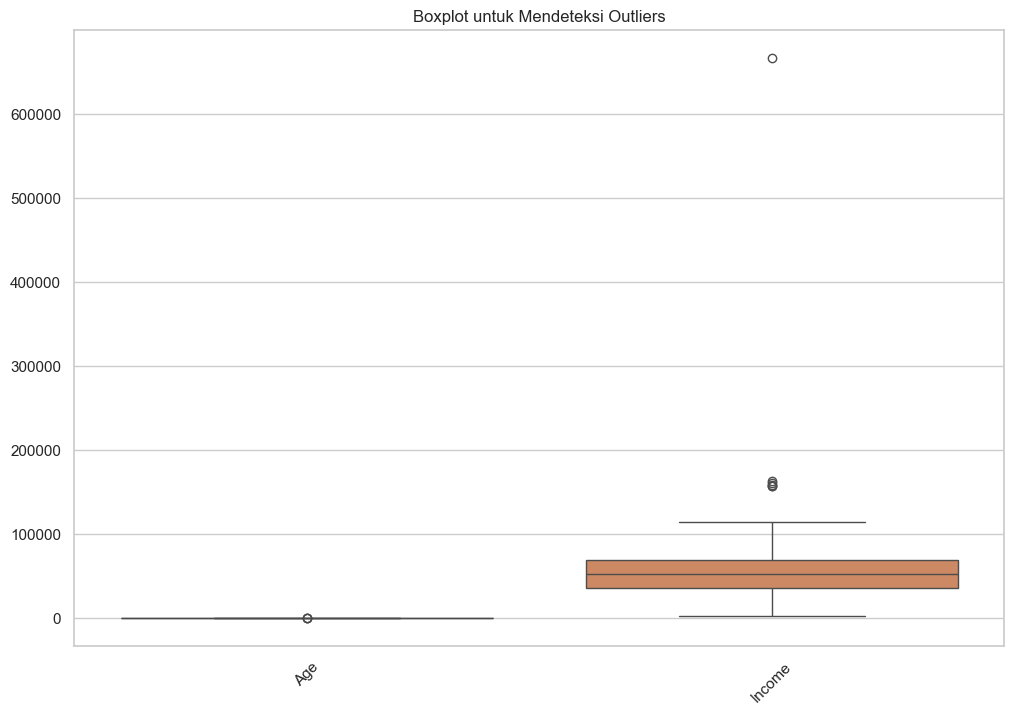

In [299]:
cols_to_visualize = ['Age', 'Income']

# Membuat boxplot untuk melihat distribusi dan outlier
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[cols_to_visualize])
plt.title('Boxplot untuk Mendeteksi Outliers')
plt.xticks(rotation=45)
plt.show()

### Age

In [300]:
df['Age'].value_counts()

Age
48     89
53     85
49     82
52     78
46     76
54     75
59     73
51     71
55     70
50     69
68     55
45     53
66     52
72     52
47     52
56     51
58     50
65     50
70     49
64     49
69     48
42     44
57     44
62     44
61     43
73     42
67     41
38     41
41     41
60     41
44     39
40     38
43     38
71     35
63     35
39     32
74     29
75     29
35     29
36     29
37     27
76     21
34     18
77     16
78     16
33     15
32     13
79      8
80      7
81      6
29      5
31      5
30      3
28      2
124     1
131     1
125     1
83      1
84      1
Name: count, dtype: int64

In [301]:
df['Age'].nlargest(10)

228     131
326     125
181     124
1928     84
411      83
37       81
345      81
402      81
880      81
1135     81
Name: Age, dtype: int64

Terdapat Customer dengan `Age` diatas 120 Tahun. Kita akan menghapus data ini untuk mempermudah melakukan analisa.

In [302]:
df = df[df['Age'] < 90]
display(df,df['Age'].nlargest(10))

,Age,Age Category,Education,Marital_Status,Income,Income Category,Kidhome,Teenhome,Total Children,Years as Cust,Recency,Wines,Fruits,Meats,Fish,Sweet,Gold Product,Total Product Purchased,Deals Purchases,Web Purchases,Catalog Purchases,Store Purchases,Count Purchased,NumWebVisitsMonth,Campaign3,Campaign4,Campaign5,Campaign1,Campaign2,Complain,Last Campaign
0,67,Baby Boomer,Bachelor,Single,58138.0,Upper-Middle Class,0,0,0,12,58,635,88,546,172,88,88,1617,3,8,10,4,22,7,0,0,0,0,0,0,1
1,70,Baby Boomer,Bachelor,Single,46344.0,Lower-Middle Class,1,1,2,10,38,11,1,6,2,1,6,27,2,1,1,2,4,5,0,0,0,0,0,0,0
2,59,Baby Boomer,Bachelor,Married,71613.0,Upper-Middle Class,0,0,0,11,26,426,49,127,111,21,42,776,1,8,2,10,20,4,0,0,0,0,0,0,0
3,40,Millennial,Bachelor,Married,26646.0,Lower-Middle Class,1,0,1,10,26,11,4,20,10,3,5,53,2,2,0,4,6,6,0,0,0,0,0,0,0
4,43,Millennial,PhD,Married,58293.0,Upper-Middle Class,1,0,1,10,94,173,43,118,46,27,15,422,5,5,3,6,14,5,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2205,57,Generation X,Bachelor,Married,61223.0,Upper-Middle Class,0,1,1,11,46,709,43,182,42,118,247,1341,2,9,3,4,16,5,0,0,0,0,0,0,0
2206,78,Baby Boomer,PhD,Married,64014.0,Upper-Middle Class,2,1,3,10,56,406,0,30,0,0,8,444,7,8,2,5,15,7,0,0,0,1,0,0,0
2207,43,Millennial,Bachelor,Divorced,56981.0,Upper-Middle Class,0,0,0,10,91,908,48,217,32,12,24,1241,1,2,3,13,18,6,0,1,0,0,0,0,0
2208,68,Baby Boomer,Master,Married,69245.0,Upper-Middle Class,0,1,1,10,8,428,30,214,80,30,61,843,2,6,5,10,21,3,0,0,0,0,0,0,0


1928    84
411     83
37      81
345     81
402     81
880     81
1135    81
1901    81
481     80
486     80
Name: Age, dtype: int64

### Income

In [303]:
df['Income'].value_counts()

Income
7500.0     12
35860.0     4
18929.0     3
46098.0     3
67445.0     3
           ..
63033.0     1
5648.0      1
33454.0     1
55635.0     1
62513.0     1
Name: count, Length: 1965, dtype: int64

In [304]:
display(df['Income'].nlargest(10), df['Income'].describe())

2203    666666.0
604     162397.0
673     160803.0
1284    157733.0
153     157243.0
1632    157146.0
1876    113734.0
633     105471.0
241     102692.0
192     102160.0
Name: Income, dtype: float64

count      2207.000000
mean      52231.350702
std       24934.449341
min        2447.000000
25%       35364.000000
50%       51390.000000
75%       68487.000000
max      666666.000000
Name: Income, dtype: float64

Terdapat satu data outlier dimana ada satu customer dengan penghasilan 666666. Data ini bisa kita hilangkan untuk mempermudah melakukan analisa.

In [305]:
df = df[df['Income'] < 666666 ]
display(df,df['Income'].describe())

,Age,Age Category,Education,Marital_Status,Income,Income Category,Kidhome,Teenhome,Total Children,Years as Cust,Recency,Wines,Fruits,Meats,Fish,Sweet,Gold Product,Total Product Purchased,Deals Purchases,Web Purchases,Catalog Purchases,Store Purchases,Count Purchased,NumWebVisitsMonth,Campaign3,Campaign4,Campaign5,Campaign1,Campaign2,Complain,Last Campaign
0,67,Baby Boomer,Bachelor,Single,58138.0,Upper-Middle Class,0,0,0,12,58,635,88,546,172,88,88,1617,3,8,10,4,22,7,0,0,0,0,0,0,1
1,70,Baby Boomer,Bachelor,Single,46344.0,Lower-Middle Class,1,1,2,10,38,11,1,6,2,1,6,27,2,1,1,2,4,5,0,0,0,0,0,0,0
2,59,Baby Boomer,Bachelor,Married,71613.0,Upper-Middle Class,0,0,0,11,26,426,49,127,111,21,42,776,1,8,2,10,20,4,0,0,0,0,0,0,0
3,40,Millennial,Bachelor,Married,26646.0,Lower-Middle Class,1,0,1,10,26,11,4,20,10,3,5,53,2,2,0,4,6,6,0,0,0,0,0,0,0
4,43,Millennial,PhD,Married,58293.0,Upper-Middle Class,1,0,1,10,94,173,43,118,46,27,15,422,5,5,3,6,14,5,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2205,57,Generation X,Bachelor,Married,61223.0,Upper-Middle Class,0,1,1,11,46,709,43,182,42,118,247,1341,2,9,3,4,16,5,0,0,0,0,0,0,0
2206,78,Baby Boomer,PhD,Married,64014.0,Upper-Middle Class,2,1,3,10,56,406,0,30,0,0,8,444,7,8,2,5,15,7,0,0,0,1,0,0,0
2207,43,Millennial,Bachelor,Divorced,56981.0,Upper-Middle Class,0,0,0,10,91,908,48,217,32,12,24,1241,1,2,3,13,18,6,0,1,0,0,0,0,0
2208,68,Baby Boomer,Master,Married,69245.0,Upper-Middle Class,0,1,1,10,8,428,30,214,80,30,61,843,2,6,5,10,21,3,0,0,0,0,0,0,0


count      2206.000000
mean      51952.821850
std       21230.066444
min        2447.000000
25%       35352.000000
50%       51381.500000
75%       68480.750000
max      162397.000000
Name: Income, dtype: float64

Memastikan outlier sudah ditangani.

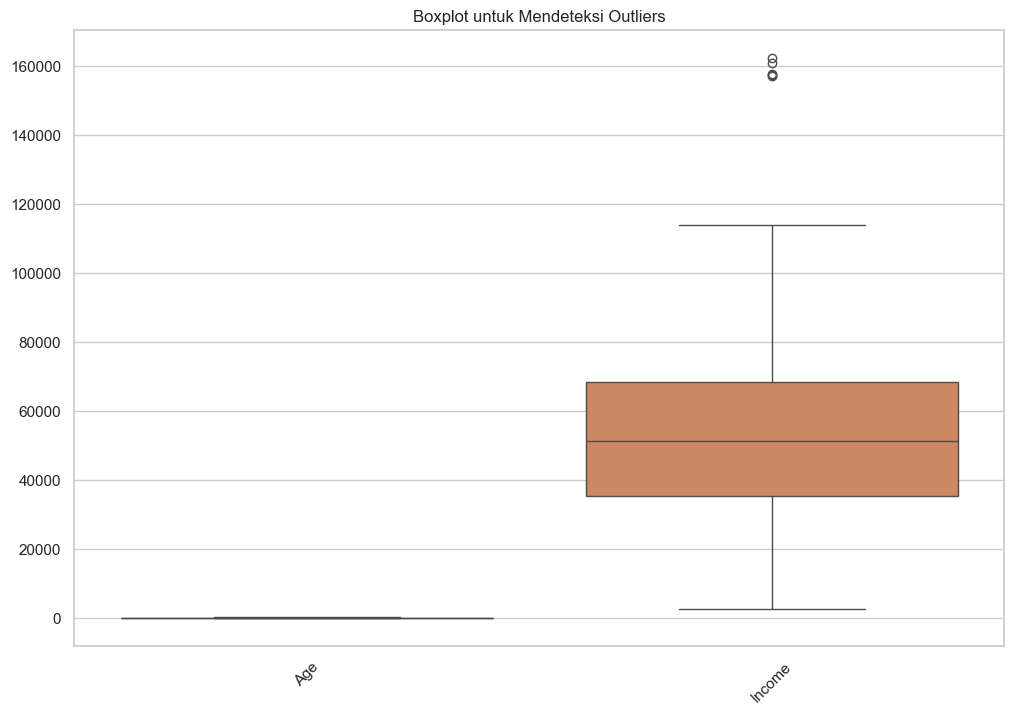

In [306]:
# Pilih beberapa kolom untuk visualisasi
cols_to_visualize = ['Age', 'Income']

# Membuat boxplot untuk melihat distribusi dan outlier
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[cols_to_visualize])
plt.title('Boxplot untuk Mendeteksi Outliers')
plt.xticks(rotation=45)
plt.show()

## Korelasi Data

Melihat hubungan antar kolom apakah saling berkaitan atau tidak secara umum (object dan numerik).

In [307]:
numerical_cols = df.select_dtypes(include=['number']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

# Display the grouped columns
print("Numerical Columns:")
print(numerical_cols)

print("\nCategorical Columns:")
print(categorical_cols)

Numerical Columns:
['Age', 'Income', 'Kidhome', 'Teenhome', 'Total Children', 'Years as Cust', 'Recency', 'Wines', 'Fruits', 'Meats', 'Fish', 'Sweet', 'Gold Product', 'Total Product Purchased', 'Deals Purchases', 'Web Purchases', 'Catalog Purchases', 'Store Purchases', 'Count Purchased', 'NumWebVisitsMonth', 'Campaign3', 'Campaign4', 'Campaign5', 'Campaign1', 'Campaign2', 'Complain', 'Last Campaign']

Categorical Columns:
['Age Category', 'Education', 'Marital_Status', 'Income Category']


In [308]:
df_numerical = df.select_dtypes(include='number')
display(df_numerical.info(),df_numerical.describe(),df_numerical)

<class 'pandas.core.frame.DataFrame'>
Index: 2206 entries, 0 to 2209
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      2206 non-null   int64  
 1   Income                   2206 non-null   float64
 2   Kidhome                  2206 non-null   int64  
 3   Teenhome                 2206 non-null   int64  
 4   Total Children           2206 non-null   int64  
 5   Years as Cust            2206 non-null   int32  
 6   Recency                  2206 non-null   int64  
 7   Wines                    2206 non-null   int64  
 8   Fruits                   2206 non-null   int64  
 9   Meats                    2206 non-null   int64  
 10  Fish                     2206 non-null   int64  
 11  Sweet                    2206 non-null   int64  
 12  Gold Product             2206 non-null   int64  
 13  Total Product Purchased  2206 non-null   int64  
 14  Deals Purchases          2206

None

,Age,Income,Kidhome,Teenhome,Total Children,Years as Cust,Recency,Wines,Fruits,Meats,Fish,Sweet,Gold Product,Total Product Purchased,Deals Purchases,Web Purchases,Catalog Purchases,Store Purchases,Count Purchased,NumWebVisitsMonth,Campaign3,Campaign4,Campaign5,Campaign1,Campaign2,Complain,Last Campaign
count,2206.000000,2206.000000,2206.000000,2206.000000,2206.000000,2206.000000,2206.000000,2206.000000,2206.000000,2206.000000,2206.000000,2206.000000,2206.000000,2206.000000,2206.000000,2206.000000,2206.000000,2206.000000,2206.000000,2206.000000,2206.000000,2206.000000,2206.000000,2206.000000,2206.000000,2206.000000,2206.000000
mean,55.078422,51952.821850,0.441976,0.506800,0.948776,10.973708,49.000453,306.111967,26.398912,167.480054,37.748867,27.118314,44.042611,608.900725,2.317316,4.099275,2.679510,5.822303,12.601088,5.305530,0.073889,0.074343,0.072983,0.064370,0.013599,0.009066,0.150952
std,11.707730,21230.066444,0.537093,0.544358,0.749062,0.685607,28.952216,337.410262,39.775794,224.392868,54.812775,41.123773,51.728710,602.517245,1.886325,2.737599,2.928197,3.241199,7.185301,2.371225,0.261650,0.262387,0.260167,0.245466,0.115847,0.094805,0.358083
min,28.000000,2447.000000,0.000000,0.000000,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,35352.000000,0.000000,0.000000,0.000000,11.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,69.000000,1.000000,2.000000,0.000000,3.000000,6.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,54.000000,51381.500000,0.000000,0.000000,1.000000,11.000000,49.000000,177.500000,8.000000,68.000000,12.000000,8.000000,25.000000,399.000000,2.000000,4.000000,2.000000,5.000000,12.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,65.000000,68480.750000,1.000000,1.000000,1.000000,11.000000,74.000000,506.500000,33.000000,233.750000,50.000000,33.750000,56.000000,1048.750000,3.000000,6.000000,4.000000,8.000000,19.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,84.000000,162397.000000,2.000000,2.000000,3.000000,12.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,2525.000000,15.000000,27.000000,28.000000,13.000000,32.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


,Age,Income,Kidhome,Teenhome,Total Children,Years as Cust,Recency,Wines,Fruits,Meats,Fish,Sweet,Gold Product,Total Product Purchased,Deals Purchases,Web Purchases,Catalog Purchases,Store Purchases,Count Purchased,NumWebVisitsMonth,Campaign3,Campaign4,Campaign5,Campaign1,Campaign2,Complain,Last Campaign
0,67,58138.0,0,0,0,12,58,635,88,546,172,88,88,1617,3,8,10,4,22,7,0,0,0,0,0,0,1
1,70,46344.0,1,1,2,10,38,11,1,6,2,1,6,27,2,1,1,2,4,5,0,0,0,0,0,0,0
2,59,71613.0,0,0,0,11,26,426,49,127,111,21,42,776,1,8,2,10,20,4,0,0,0,0,0,0,0
3,40,26646.0,1,0,1,10,26,11,4,20,10,3,5,53,2,2,0,4,6,6,0,0,0,0,0,0,0
4,43,58293.0,1,0,1,10,94,173,43,118,46,27,15,422,5,5,3,6,14,5,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2205,57,61223.0,0,1,1,11,46,709,43,182,42,118,247,1341,2,9,3,4,16,5,0,0,0,0,0,0,0
2206,78,64014.0,2,1,3,10,56,406,0,30,0,0,8,444,7,8,2,5,15,7,0,0,0,1,0,0,0
2207,43,56981.0,0,0,0,10,91,908,48,217,32,12,24,1241,1,2,3,13,18,6,0,1,0,0,0,0,0
2208,68,69245.0,0,1,1,10,8,428,30,214,80,30,61,843,2,6,5,10,21,3,0,0,0,0,0,0,0


In [309]:
df_categorical = df.select_dtypes(include=['object', 'category'])
display(df_categorical.info(),df_categorical.describe(),df_categorical)

<class 'pandas.core.frame.DataFrame'>
Index: 2206 entries, 0 to 2209
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Age Category     2206 non-null   object
 1   Education        2206 non-null   object
 2   Marital_Status   2206 non-null   object
 3   Income Category  2206 non-null   object
dtypes: object(4)
memory usage: 86.2+ KB


None

,Age Category,Education,Marital_Status,Income Category
count,2206,2206,2206,2206
unique,4,4,3,4
top,Generation X,Bachelor,Married,Upper-Middle Class
freq,983,1111,1426,1141


,Age Category,Education,Marital_Status,Income Category
0,Baby Boomer,Bachelor,Single,Upper-Middle Class
1,Baby Boomer,Bachelor,Single,Lower-Middle Class
2,Baby Boomer,Bachelor,Married,Upper-Middle Class
3,Millennial,Bachelor,Married,Lower-Middle Class
4,Millennial,PhD,Married,Upper-Middle Class
...,...,...,...,...
2205,Generation X,Bachelor,Married,Upper-Middle Class
2206,Baby Boomer,PhD,Married,Upper-Middle Class
2207,Millennial,Bachelor,Divorced,Upper-Middle Class
2208,Baby Boomer,Master,Married,Upper-Middle Class


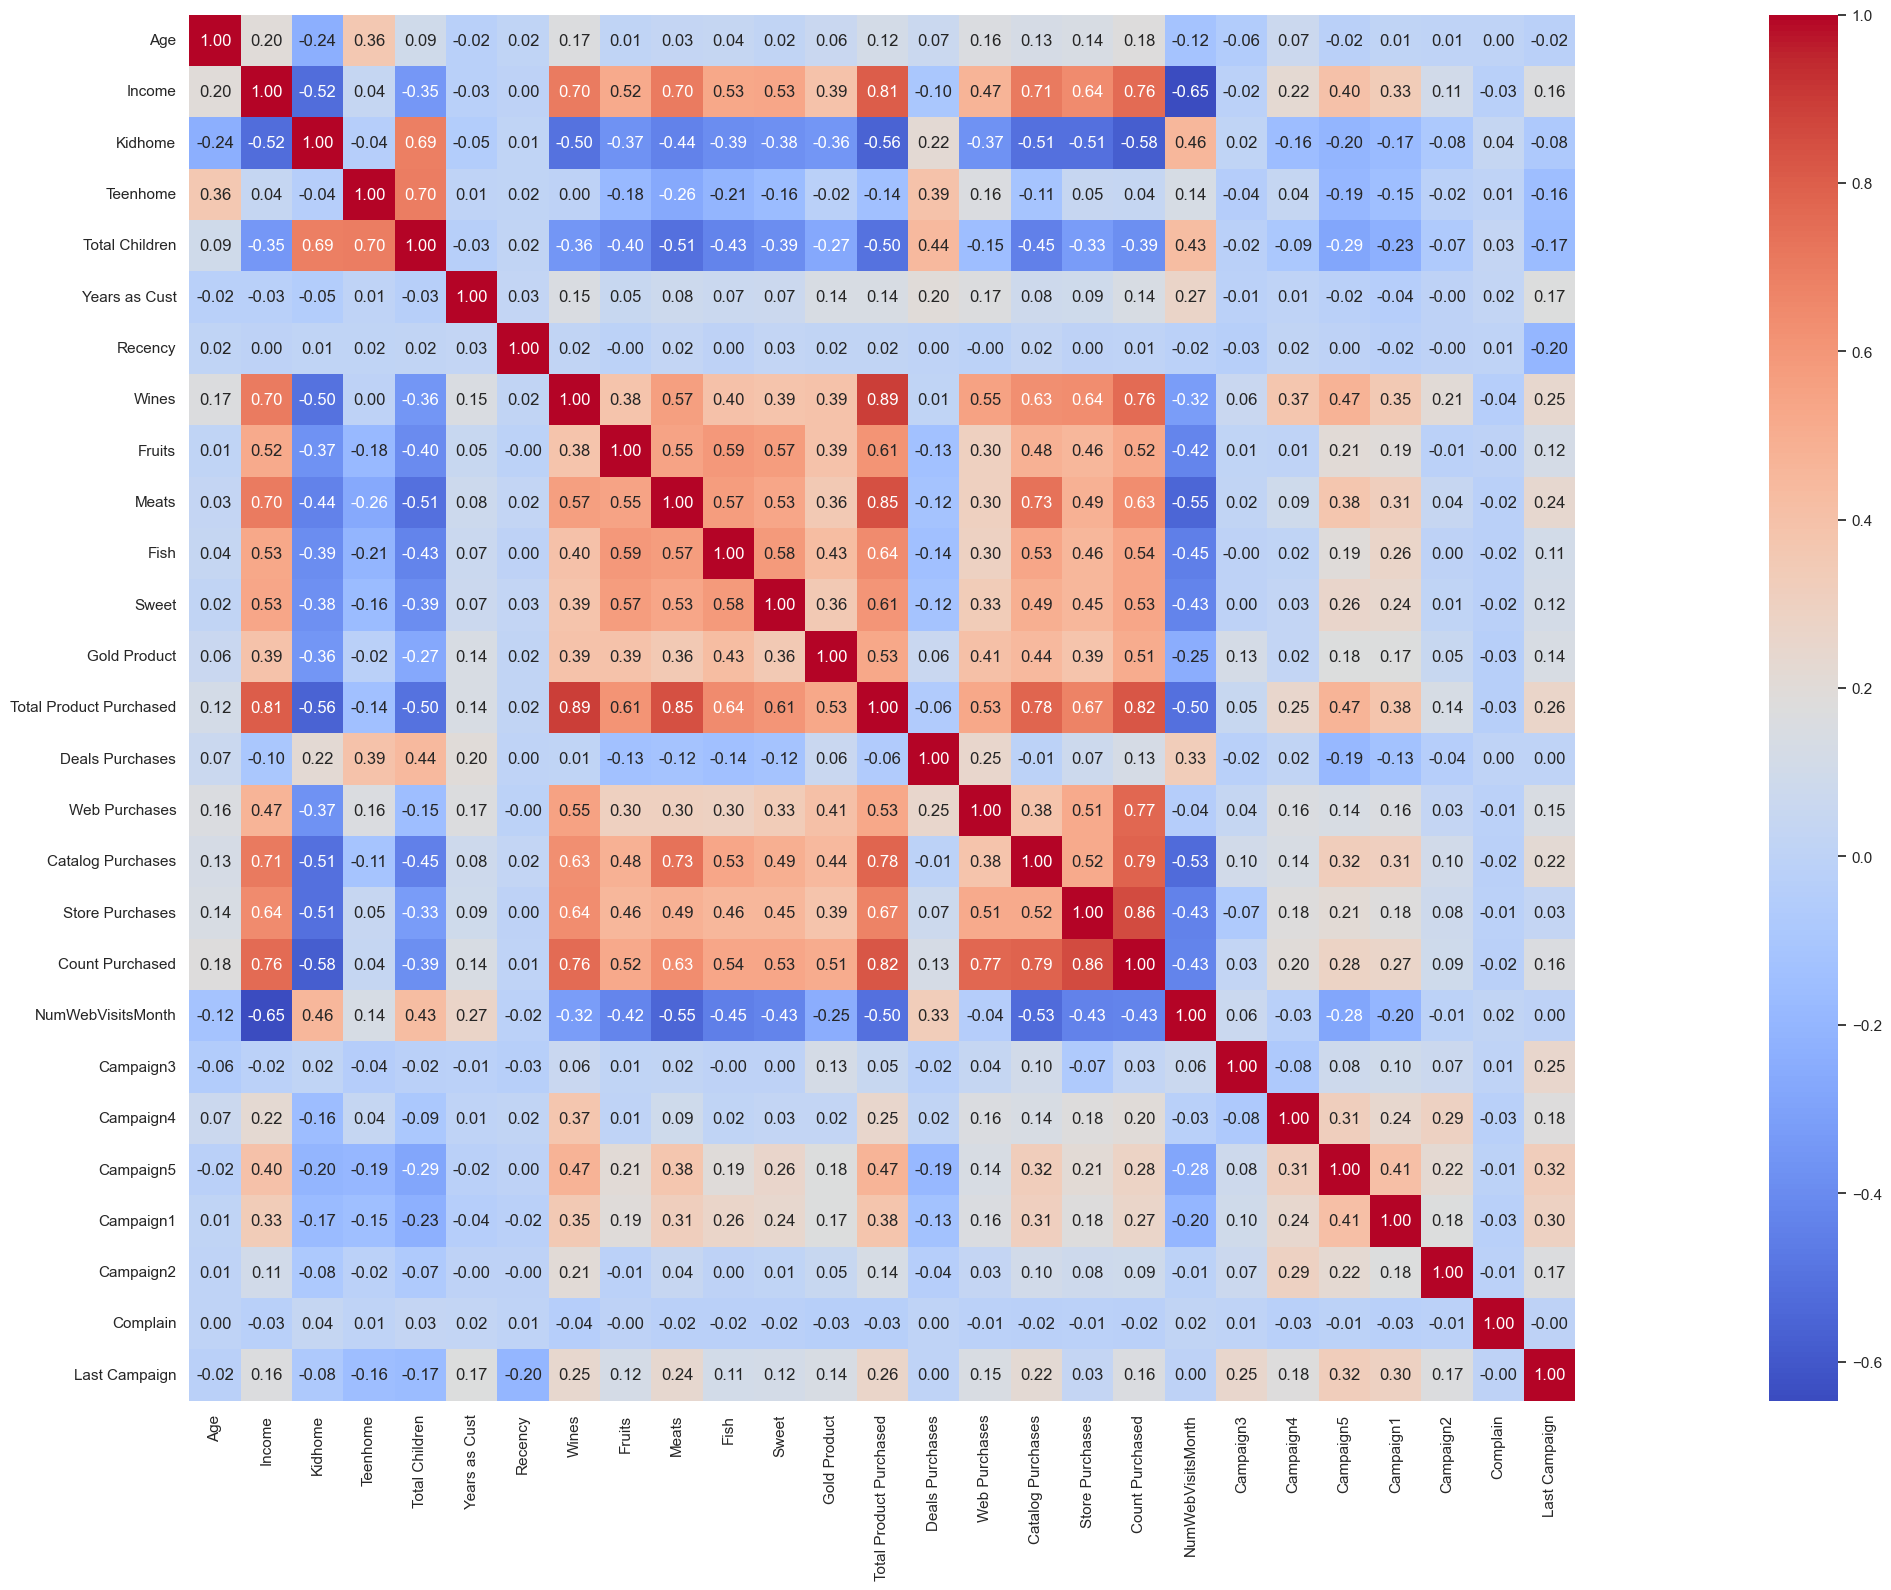

In [310]:
correlation = df_numerical.corr()
plt.figure(figsize=(50,18))
sns.heatmap(correlation, annot=True, fmt=".2f", cmap='coolwarm',square=True)
plt.show()

## Uji Normalitas

In [311]:
import pandas as pd
from scipy import stats

# Misalkan df_numerical adalah DataFrame yang berisi kolom numerik
# Inisialisasi list kosong untuk menyimpan hasil uji
!pip install jinja2

results = []

# Loop untuk melakukan uji Shapiro-Wilk
for column in df_numerical:
    stat, p_value = stats.shapiro(df_numerical[column].dropna())
    
    # Tentukan distribusi normal
    if p_value < 0.05:
        normality = 'Tidak Berdistribusi Normal'
    else:
        normality = 'Berdistribusi Normal'
    
    # Simpan hasil uji dalam list
    results.append({
        'Kolom': column,
        'Statistik Uji': f'{stat:.3f}',
        'p-value': f'{p_value:.3f}',
        'Hasil Uji': normality
    })

# Membuat DataFrame dari list results
df_shapiro_results = pd.DataFrame(results)

# Menambahkan styling: rata tengah untuk kolom dan header
df_shapiro_results = df_shapiro_results.style.set_properties(
    **{'text-align': 'center'}  # Styling untuk konten
).set_table_styles(
    [{'selector': 'th', 'props': [('text-align', 'center')]}]  # Styling untuk header
)

# Menampilkan DataFrame dengan styling
df_shapiro_results


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


,Kolom,Statistik Uji,p-value,Hasil Uji
0,Age,0.983,0.000,Tidak Berdistribusi Normal
1,Income,0.977,0.000,Tidak Berdistribusi Normal
2,Kidhome,0.675,0.000,Tidak Berdistribusi Normal
3,Teenhome,0.694,0.000,Tidak Berdistribusi Normal
4,Total Children,0.829,0.000,Tidak Berdistribusi Normal
5,Years as Cust,0.803,0.000,Tidak Berdistribusi Normal
6,Recency,0.954,0.000,Tidak Berdistribusi Normal
7,Wines,0.840,0.000,Tidak Berdistribusi Normal
8,Fruits,0.691,0.000,Tidak Berdistribusi Normal
9,Meats,0.734,0.000,Tidak Berdistribusi Normal


## Analisa Data

### Demografi Pelanggan
Dilakukan berdasarkan pendidikan, umur, status perkawinan dan income

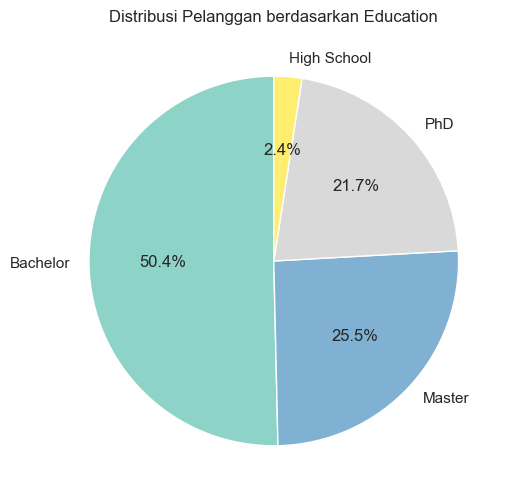

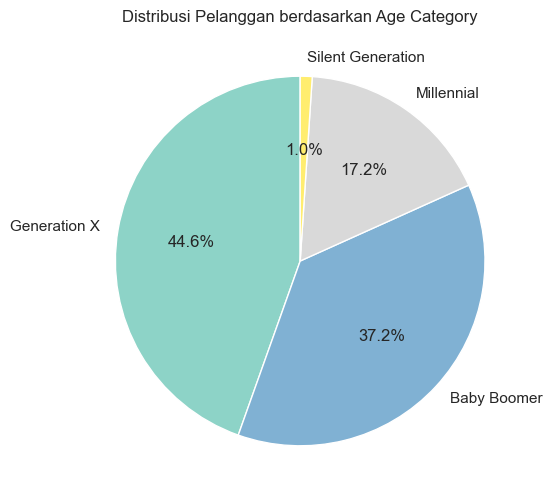

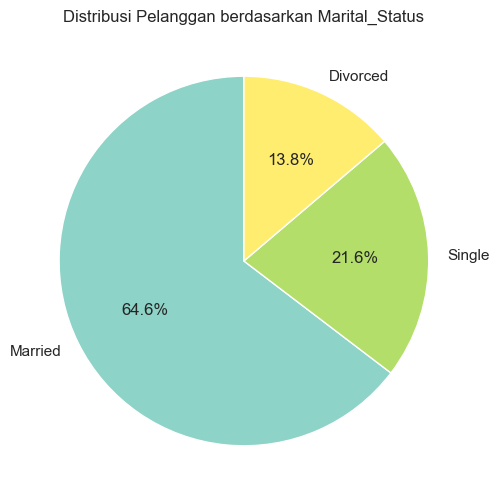

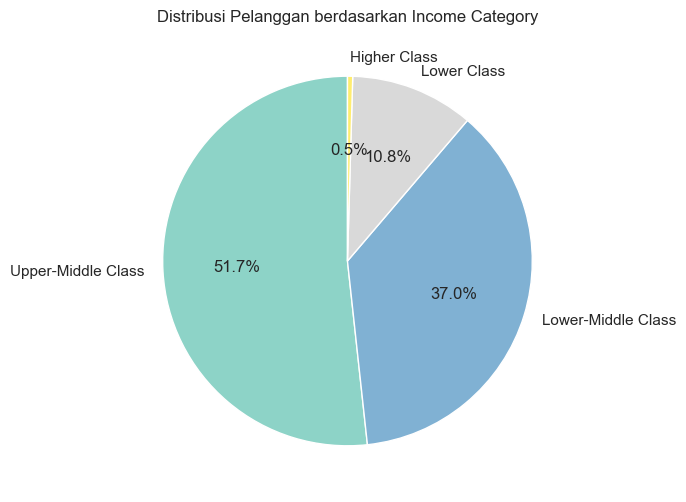

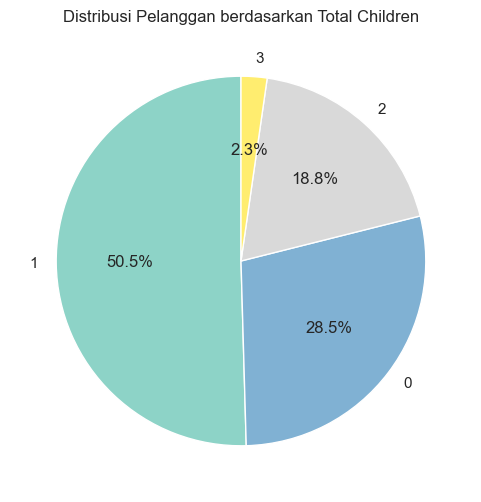

In [312]:
import pandas as pd
import matplotlib.pyplot as plt

# Misalnya, df adalah DataFrame Anda yang sudah ada
# df = pd.read_csv('path_to_your_file.csv')

def plot_pie_chart(column_name):
    # Mengecek apakah kolom yang diberikan ada dalam DataFrame
    if column_name in df.columns:
        # Membuat pie chart
        plt.figure(figsize=(6,6))
        df[column_name].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, cmap='Set3')
        plt.title(f'Distribusi Pelanggan berdasarkan {column_name}')
        plt.ylabel('')  # Menghilangkan label y agar lebih rapi
        plt.show()
    else:
        print(f'Kolom "{column_name}" tidak ditemukan dalam dataset.')

# Membuat pie chart untuk kolom yang diinginkan menggunakan if
columns_to_plot = ['Education', 'Age Category', 'Marital_Status', 'Income Category', 'Total Children']

for col in columns_to_plot:
    plot_pie_chart(col)


*Insight*
- Distribusi Pelanggan terbesar berdasarkan tingkat Education berada pada tingkat Bachelor sebesar 50,4%.
- Distribusi Pelanggan terbesar berdasarkan Age Category berada pada Generation X (44-58 tahun) sebesar 44,6%
- Distirbusi Pelanggan terbesar berdasarkan Marita Status berada pada pelanggan berstatus Married sebesar 64,6%
- Distrbusi Pelanggan terbesar berdasarkan Income Category berada pada pelanggan dengan income Upper-Middle class ($50,000 - $100,000) sebesar 51.7%
- Distribusi Pelanggan berdsarkan Total Children berada pada pelanggan dengan jumlah anak 1 sebesar 50,5%

### Analisis Campaign pada produk Meats
Pada tahap ini, kita menganalisis efektifitas setiap campaign (Campaign1 hingga Last_Campaign).
* Berapa banyak pelanggan yang menerima penawaran pada setiap kampanye?
* Kampanye yang paling banyak diterima oleh pelanggan akan menjadi acuan pada analisis selanjutnya, karena dianggap sebagai campanye terbaik saat ini.

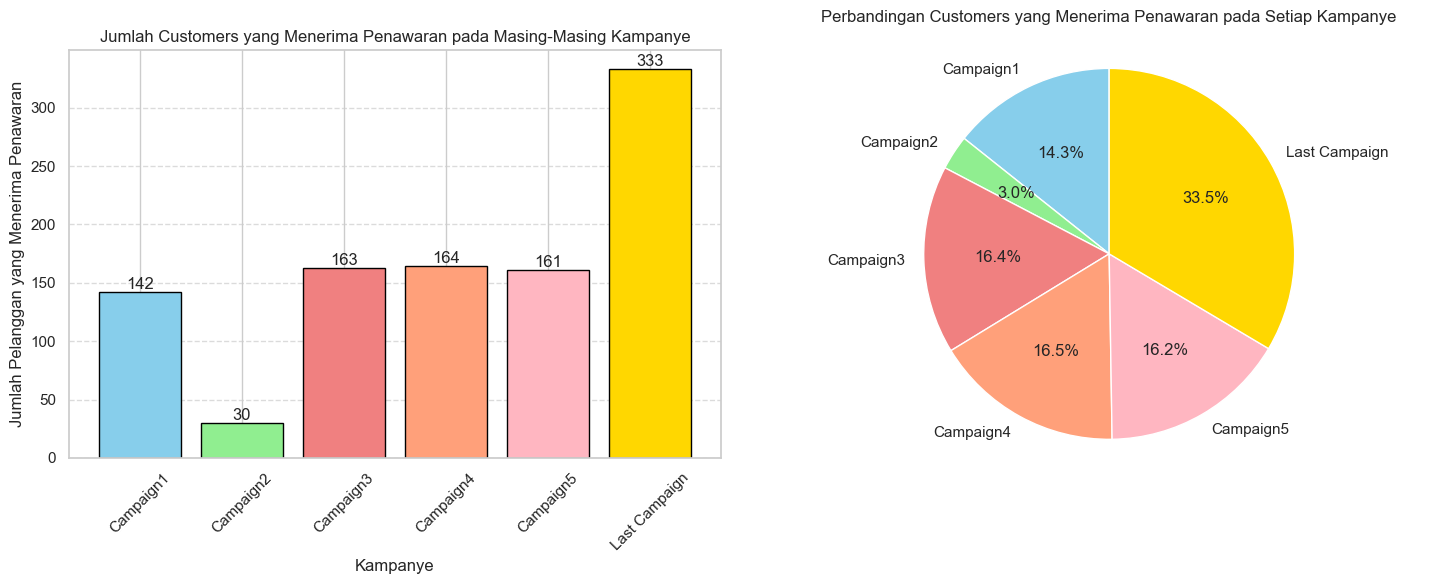

In [313]:
campaigns = ['Campaign1', 'Campaign2', 'Campaign3', 'Campaign4', 'Campaign5', 'Last Campaign']
campaign_counts = df[campaigns].sum()

# Data untuk pie chart
total_customers = campaign_counts.sum()
percentages = (campaign_counts / total_customers) * 100
labels = campaign_counts.index
colors = ['skyblue', 'lightgreen', 'lightcoral', 'lightsalmon', 'lightpink', 'gold']

# Membuat gambar besar dengan dua subplot (1 bar plot dan 1 pie chart)
plt.figure(figsize=(15, 6))

# Subplot untuk bar plot
plt.subplot(1, 2, 1)
plt.bar(campaign_counts.index, campaign_counts.values, color=colors, edgecolor='black')
plt.xlabel('Kampanye')
plt.ylabel('Jumlah Pelanggan yang Menerima Penawaran')
plt.title('Jumlah Customers yang Menerima Penawaran pada Masing-Masing Kampanye')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
for i, v in enumerate(campaign_counts.values):
    plt.text(i, v, str(v), ha='center', va='bottom', fontsize=12)

# Subplot untuk pie chart
plt.subplot(1, 2, 2)
plt.pie(percentages, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
plt.axis('equal')
plt.title('Perbandingan Customers yang Menerima Penawaran pada Setiap Kampanye', pad=20)

plt.tight_layout()
plt.show()

Dari seluruh campaign yang telah dilakukan oleh Supermarket:<br>
* `Last Campaign` merupakan campaign terbaik yang terbukti mampu menarik sebanyak 333 customers. Artinya `Last Campaign`  unggul 100 % dari campaign4 yang merupakan campaign terbaik kedua.
* Karena `Last Campaign` merupakan campaign terbaik saat ini, untuk itu, analisis selanjutnya akan berfokus pada `Last Campaign`.


#### Overview
Kita mencoba melihat sebaran yang membeli product `Meat` berdasarkan pelanggan yang menerima dan tidak menerima `Last Campaign`

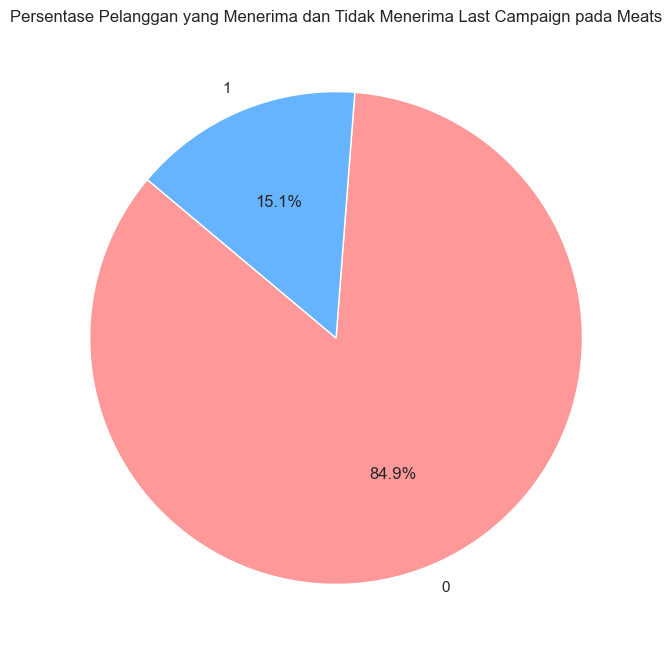

In [314]:
import matplotlib.pyplot as plt

# Mendapatkan data distribusi kampanye
meat_buyers = df[df['Meats'] > 0]
campaign_distribution = meat_buyers['Last Campaign'].value_counts()

# Membuat pie chart dengan Matplotlib
plt.figure(figsize=(8, 8))
plt.pie(
    campaign_distribution.values,
    labels=campaign_distribution.index,
    autopct='%1.1f%%',
    colors=['#ff9999','#66b3ff'],
    startangle=140
)
plt.title('Persentase Pelanggan yang Menerima dan Tidak Menerima Last Campaign pada Meats')
plt.show()


Dari seluruh pelanggan, hanya 15% dari mereka yang menerima `Last Campaign` untuk produk `Meats`. Jumlah ini bahkan masih sangat sedikit sehingga akan muncul pertanyaan:
- Kenapa banyak pelanggan yang tidak menerima `Last Campaign`?
- Apakah ada target pasar yang masih kurang tepat sasaran?

##### Total pembelian Meats pada pelanggan yang menerima dan tidak menerima Last Campaign

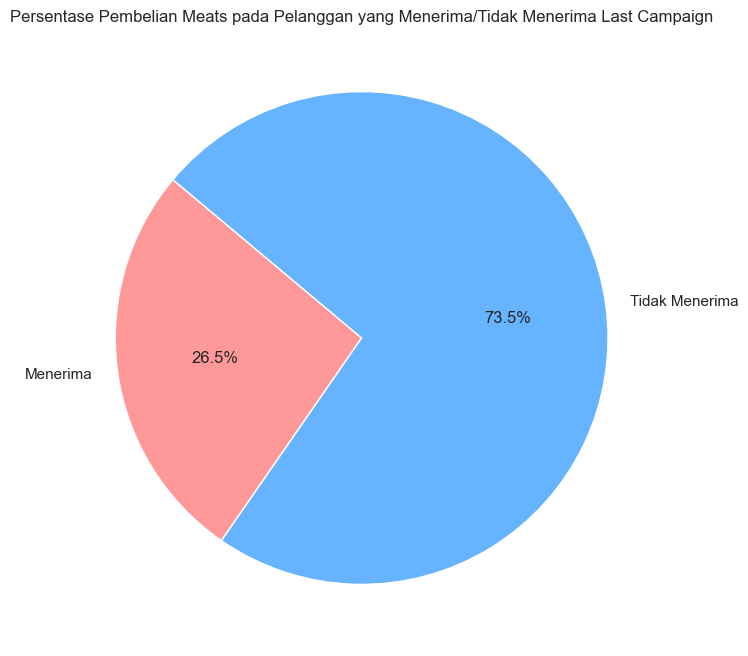

In [315]:
campaign_received = df[df['Last Campaign'] == 1]

campaign_not_received = df[df['Last Campaign'] == 0]

total_pembelian_received = campaign_received['Meats'].sum()
total_pembelian_not_received = campaign_not_received['Meats'].sum()

data = pd.DataFrame({
    'Status Campaign': ['Menerima', 'Tidak Menerima'],
    'Total Pembelian Wines': [total_pembelian_received, total_pembelian_not_received]
})

labels = ['Menerima', 'Tidak Menerima']
sizes = [total_pembelian_received, total_pembelian_not_received]
colors = ['#ff9999','#66b3ff']  # Warna pastel

# Membuat pie chart dengan Matplotlib
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Persentase Pembelian Meats pada Pelanggan yang Menerima/Tidak Menerima Last Campaign')
plt.show()

Dari seluruh penjualan Meats, Last Campaign hanya mampu menyumbang 26,5% penjualan dikarenakan hanya 15,1% pelanggan yang menerima Last Campaign dari total pelanggan. Hal ini menjadi tantangan bagaimana campaign selanjutnya dapat menjangkau banyak pelanggan sehingga dapat meningkatkan penjualan.

#### Terhadap Education

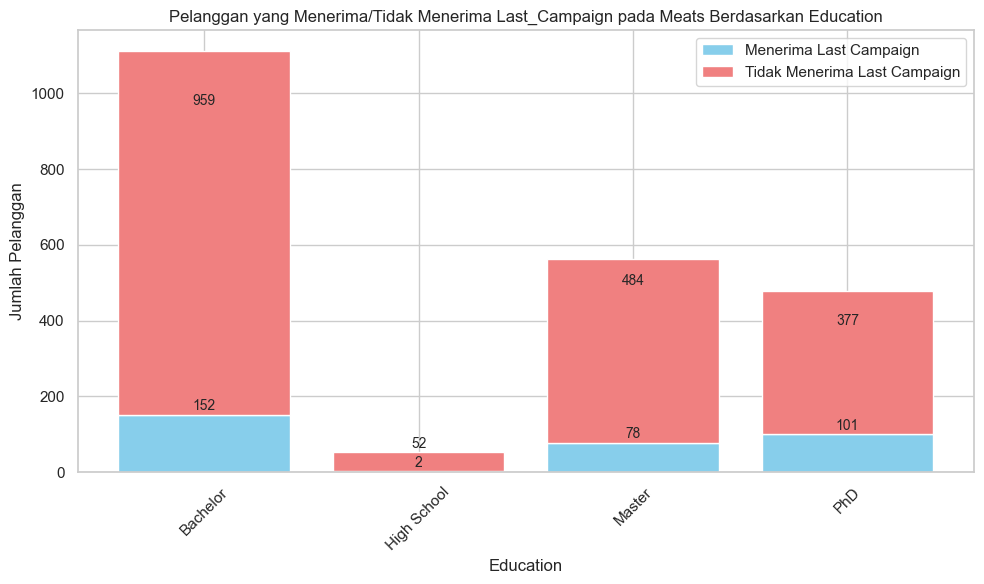

In [316]:
campaign_by_education = meat_buyers.groupby(['Education', 'Last Campaign']).size().unstack(fill_value=0)
fig, ax = plt.subplots(figsize=(10, 6))
bar1 = ax.bar(campaign_by_education.index, campaign_by_education[1], label='Menerima Last Campaign', color='skyblue')
bar2 = ax.bar(campaign_by_education.index, campaign_by_education[0], label='Tidak Menerima Last Campaign', color='lightcoral', bottom=campaign_by_education[1])
for bars in [bar1, bar2]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{int(height)}', xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3), 
                    textcoords="offset points", ha='center', fontsize=10)
ax.set_xlabel('Education')
ax.set_ylabel('Jumlah Pelanggan')
ax.set_title('Pelanggan yang Menerima/Tidak Menerima Last_Campaign pada Meats Berdasarkan Education')
ax.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

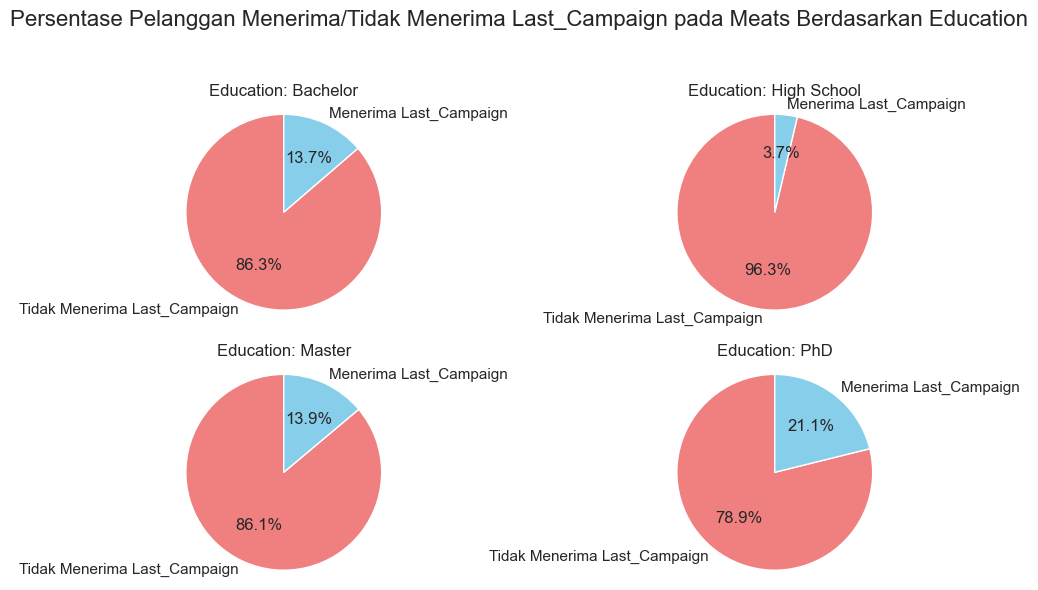

In [317]:
educations = campaign_by_education.index
fig, axs = plt.subplots(2, 2, figsize=(10, 6))
fig.suptitle('Persentase Pelanggan Menerima/Tidak Menerima Last_Campaign pada Meats Berdasarkan Education', fontsize=16)
for i, education in enumerate(educations):
    row = i // 2
    col = i % 2
    data = campaign_by_education.loc[education]
    labels = ['Tidak Menerima Last_Campaign', 'Menerima Last_Campaign']
    colors = ['lightcoral', 'skyblue']
    
    axs[row, col].pie(data, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
    axs[row, col].set_title(f'Education: {education}')
    axs[row, col].axis('equal') 

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

- Dari visualisasi data di atas, Pelanggan didominasi oleh kalangan Bachelor sebanyak 1111 pelanggan. Namun hanya 152 pelanggan atau 13,7% dari total kalangan Bachelor yang mendapat Last Campaign dan melakukan pembelian Meats
- Jika dibandingkan dengan kalangan PhD yang berjumlah 478 orang, ada sebanyak 101 orang atau 21,1% yang menerima Last Campaign serta melakukan pembelian Meats
- Kalangan Bachelor adalah pelanggan paling banyak diantara kalangan lain yang artinya minat mereka terhadap Meats cukup tinggi. Kita perlu memahami hubungannya dengan Income para Bachelor sehingga campaign selanjutnya dapat tepat saran.

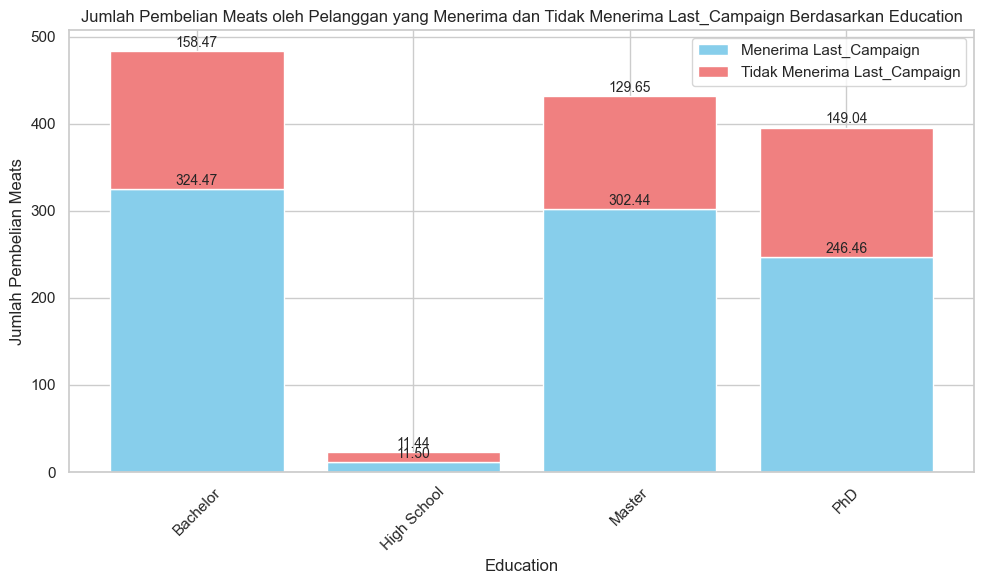

In [318]:
campaign_meats_by_education = df.groupby(['Education', 'Last Campaign']).agg({'Meats': 'mean'}).unstack(fill_value=0)
fig, ax = plt.subplots(figsize=(10, 6))
bar1 = ax.bar(campaign_meats_by_education.index, campaign_meats_by_education[('Meats', 1)], label='Menerima Last_Campaign', color='skyblue')
bar2 = ax.bar(campaign_meats_by_education.index, campaign_meats_by_education[('Meats', 0)], label='Tidak Menerima Last_Campaign', color='lightcoral', bottom=campaign_meats_by_education[('Meats', 1)])

for bar, bar2 in zip(bar1, bar2):
    height1 = bar.get_height()
    height2 = bar2.get_height()
    ax.annotate(f'{height1:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height1), xytext=(0, 3), 
                textcoords="offset points", ha='center', fontsize=10)
    ax.annotate(f'{height2:.2f}', xy=(bar2.get_x() + bar2.get_width() / 2, height1 + height2), xytext=(0, 3), 
                textcoords="offset points", ha='center', fontsize=10)

ax.set_xlabel('Education')
ax.set_ylabel('Jumlah Pembelian Meats')
ax.set_title('Jumlah Pembelian Meats oleh Pelanggan yang Menerima dan Tidak Menerima Last_Campaign Berdasarkan Education')
ax.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('rata-rata wine vs education accept campaign.png')
plt.show()

Berdasarkan barplot diatas, ternyata pelanggan yang menerima campaign melakukan rata-rata pembelian lebih banyak dibanding pelanggan yang tidak menerima campaign. Artinya ada potensi yang sangat besar jika bisa menargetkan campaign selanjutnya pada kalangan Bachelor karena pangsa pasar paling besar namun salah satu yang terendah dalam penerimaan campaign.

#### Terhadap Marital Status

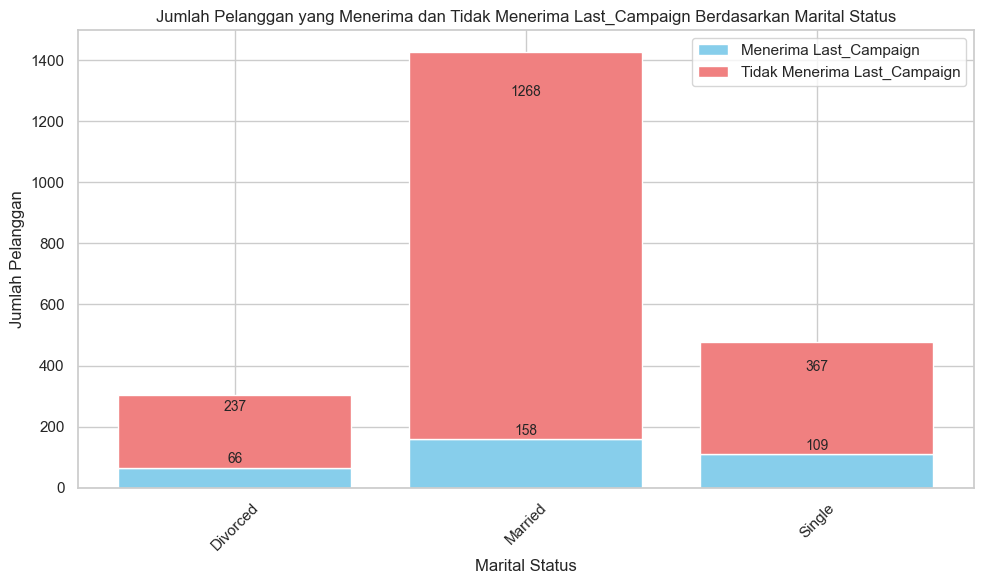

In [319]:
campaign_by_marital = meat_buyers.groupby(['Marital_Status', 'Last Campaign']).size().unstack(fill_value=0)
fig, ax = plt.subplots(figsize=(10, 6))
bar1 = ax.bar(campaign_by_marital.index, campaign_by_marital[1], label='Menerima Last_Campaign', color='skyblue')
bar2 = ax.bar(campaign_by_marital.index, campaign_by_marital[0], label='Tidak Menerima Last_Campaign', color='lightcoral', bottom=campaign_by_marital[1])
for bars in [bar1, bar2]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{int(height)}', xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3), 
                    textcoords="offset points", ha='center', fontsize=10)
ax.set_xlabel('Marital Status')
ax.set_ylabel('Jumlah Pelanggan')
ax.set_title('Jumlah Pelanggan yang Menerima dan Tidak Menerima Last_Campaign Berdasarkan Marital Status')
ax.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('jumlah wine vs marital accept campaign.png')
plt.show()

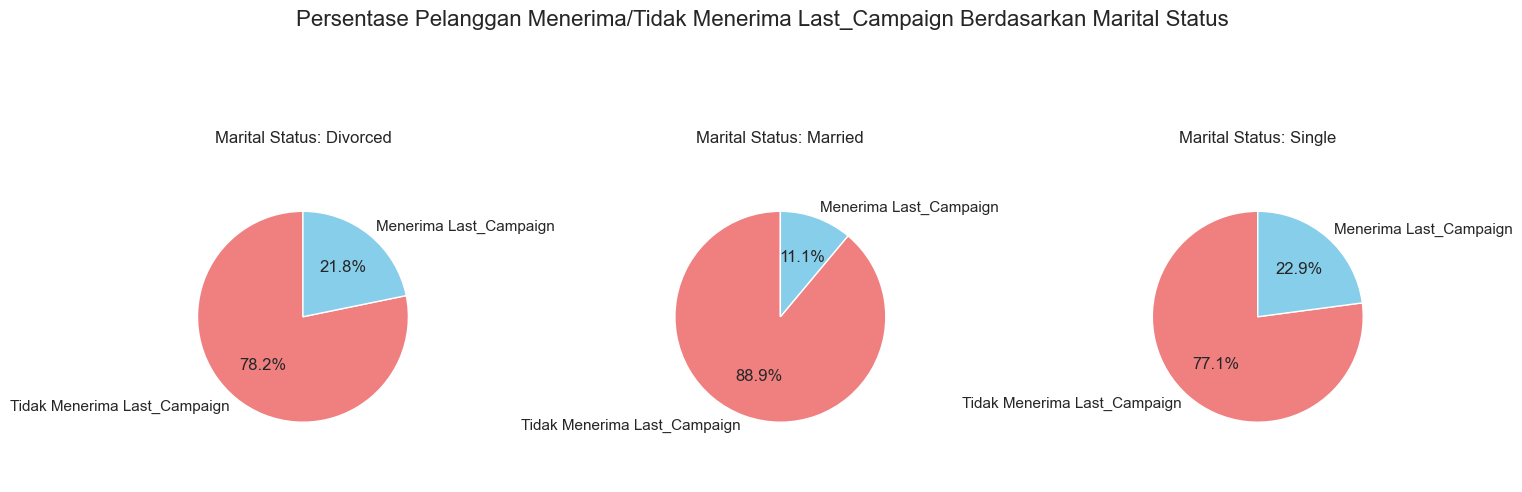

In [320]:
maritals = campaign_by_marital.index

fig, axs = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Persentase Pelanggan Menerima/Tidak Menerima Last_Campaign Berdasarkan Marital Status', fontsize=16)

for i, marital in enumerate(maritals):
    data = campaign_by_marital.loc[marital]
    labels = ['Tidak Menerima Last_Campaign', 'Menerima Last_Campaign']
    colors = ['lightcoral', 'skyblue']

    axs[i].pie(data, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
    axs[i].set_title(f'Marital Status: {marital}')
    axs[i].axis('equal')

plt.tight_layout(rect=[0, 0, 1, 0.85])
plt.savefig('persentase wine vs marital accept campaign.png')
plt.show()

- Pembelian Meats terbanyak dilakukan oleh pelanggan berstatus `Married` dengan total 1426 pelanggan, namun hanya 158 pelanggan berstatus `Married` yang menerima `Last Campaign`. 
- Jika dibandingkand dengan `Single` yang berjumlah 476 terdapat 109 pelanggan atau 22,9% dari total yg menerima Last Campaign

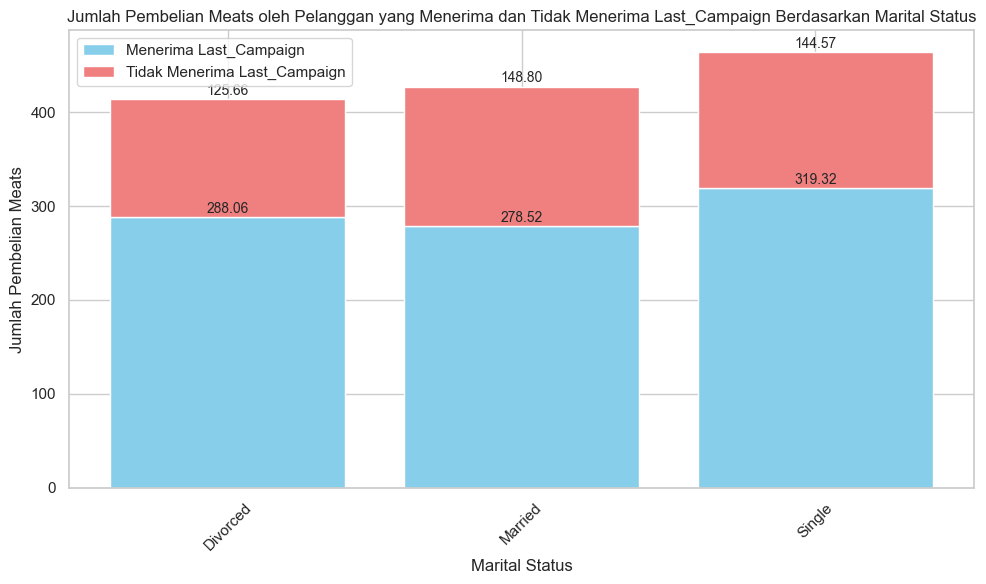

In [321]:
campaign_meats_by_marital = df.groupby(['Marital_Status', 'Last Campaign']).agg({'Meats': 'mean'}).unstack(fill_value=0)
fig, ax = plt.subplots(figsize=(10, 6))
bar1 = ax.bar(campaign_meats_by_marital.index, campaign_meats_by_marital[('Meats', 1)], label='Menerima Last_Campaign', color='skyblue')
bar2 = ax.bar(campaign_meats_by_marital.index, campaign_meats_by_marital[('Meats', 0)], label='Tidak Menerima Last_Campaign', color='lightcoral', bottom=campaign_meats_by_marital[('Meats', 1)])

for bar, bar2 in zip(bar1, bar2):
    height1 = bar.get_height()
    height2 = bar2.get_height()
    ax.annotate(f'{height1:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height1), xytext=(0, 3), 
                textcoords="offset points", ha='center', fontsize=10)
    ax.annotate(f'{height2:.2f}', xy=(bar2.get_x() + bar2.get_width() / 2, height1 + height2), xytext=(0, 3), 
                textcoords="offset points", ha='center', fontsize=10)

ax.set_xlabel('Marital Status')
ax.set_ylabel('Jumlah Pembelian Meats')
ax.set_title('Jumlah Pembelian Meats oleh Pelanggan yang Menerima dan Tidak Menerima Last_Campaign Berdasarkan Marital Status')
ax.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Berdasarkan barplot diatas, ternyata pelanggan yang menerima campaign melakukan rata-rata pembelian lebih banyak dibanding pelanggan yang tidak menerima campaign. Artinya ada potensi yang sangat besar jika Supermarket bisa menargetkan campaign selanjutnya pada pelanggan berstatus `Married`, karena memiliki pangsa pasar paling besar namun yang terendah dalam penerimaan campaign.

#### Terhadap Income

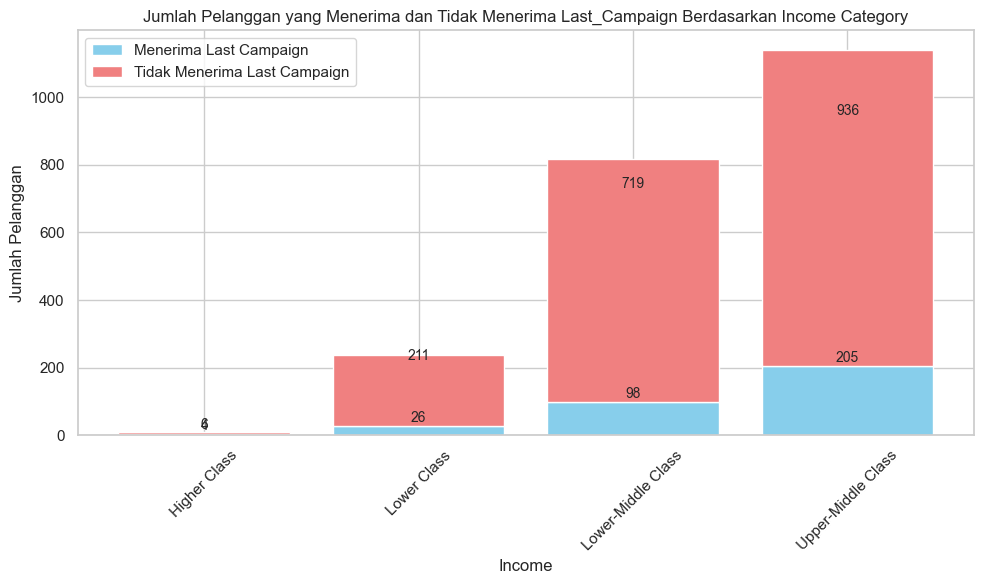

In [322]:
campaign_by_income = meat_buyers.groupby(['Income Category', 'Last Campaign']).size().unstack(fill_value=0)
fig, ax = plt.subplots(figsize=(10, 6))
bar1 = ax.bar(campaign_by_income.index, campaign_by_income[1], label='Menerima Last Campaign', color='skyblue')
bar2 = ax.bar(campaign_by_income.index, campaign_by_income[0], label='Tidak Menerima Last Campaign', color='lightcoral', bottom=campaign_by_income[1])
for bars in [bar1, bar2]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{int(height)}', xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3), 
                    textcoords="offset points", ha='center', fontsize=10)
ax.set_xlabel('Income')
ax.set_ylabel('Jumlah Pelanggan')
ax.set_title('Jumlah Pelanggan yang Menerima dan Tidak Menerima Last_Campaign Berdasarkan Income Category')
ax.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

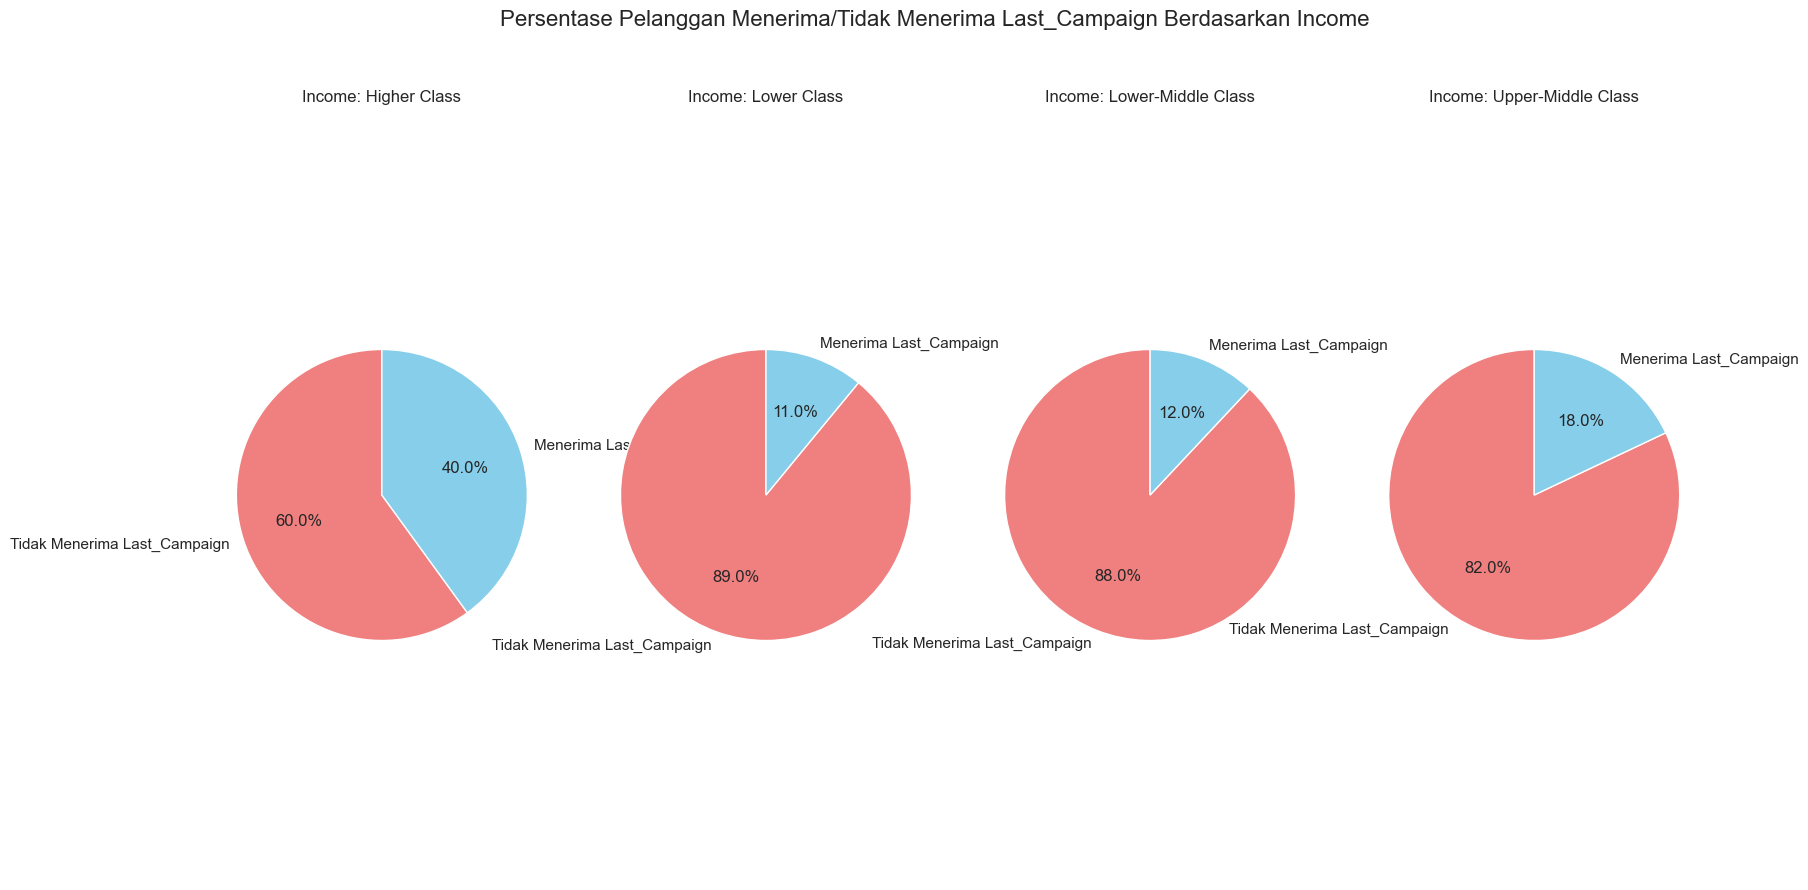

In [323]:
incomes = campaign_by_income.index

fig, axs = plt.subplots(1, 4, figsize=(19, 10))
fig.suptitle('Persentase Pelanggan Menerima/Tidak Menerima Last_Campaign Berdasarkan Income', fontsize=16)

for i, income in enumerate(incomes):
    data = campaign_by_income.loc[income]
    labels = ['Tidak Menerima Last_Campaign', 'Menerima Last_Campaign']
    colors = ['lightcoral', 'skyblue']

    axs[i].pie(data, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
    axs[i].set_title(f'Income: {income}')
    axs[i].axis('equal')

plt.tight_layout(rect=[5, 5, 5, 5])
plt.show()

* Jika kita lihat pada bar plot diatas, Pelanggan paling banyak didominasi oleh kalangan yang memiliki `Upper-Middle Income` yaitu berjumlah 1141 pelanggan. Namun dari seluruh pelanggan yang ada, hanya 205 orang atau 18% saja yang menerima Last_Campaign dan melakukan pembelian pada produk `Meats`.
* Campaign ini sudah tepat disasaran kepada `Upper-Middle Class` yang merupakan pelanggan terbanyak dibanding kategori income lainnya. Perlu diperhatikan bagaimana caranya untuk meningkatkan persentase penerimaan campaign sehingga dapat meningkatkan penjualan `Meats`.

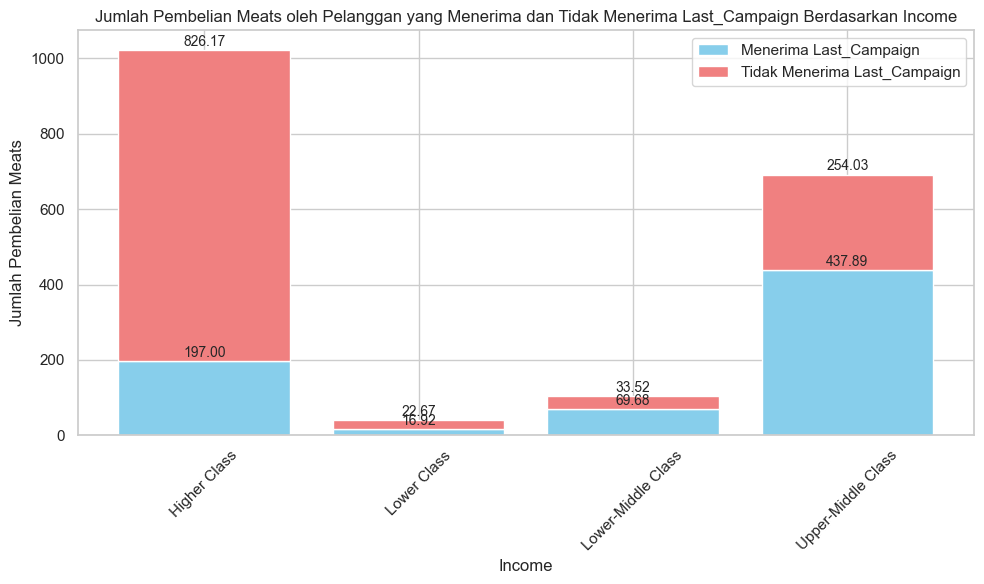

In [324]:
campaign_meats_by_income = df.groupby(['Income Category', 'Last Campaign']).agg({'Meats': 'mean'}).unstack(fill_value=0)
fig, ax = plt.subplots(figsize=(10, 6))
bar1 = ax.bar(campaign_meats_by_income.index, campaign_meats_by_income[('Meats', 1)], label='Menerima Last_Campaign', color='skyblue')
bar2 = ax.bar(campaign_meats_by_income.index, campaign_meats_by_income[('Meats', 0)], label='Tidak Menerima Last_Campaign', color='lightcoral', bottom=campaign_meats_by_income[('Meats', 1)])

for bar, bar2 in zip(bar1, bar2):
    height1 = bar.get_height()
    height2 = bar2.get_height()
    ax.annotate(f'{height1:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height1), xytext=(0, 3), 
                textcoords="offset points", ha='center', fontsize=10)
    ax.annotate(f'{height2:.2f}', xy=(bar2.get_x() + bar2.get_width() / 2, height1 + height2), xytext=(0, 3), 
                textcoords="offset points", ha='center', fontsize=10)

ax.set_xlabel('Income')
ax.set_ylabel('Jumlah Pembelian Meats')
ax.set_title('Jumlah Pembelian Meats oleh Pelanggan yang Menerima dan Tidak Menerima Last_Campaign Berdasarkan Income')
ax.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('rata-rata wine vs income accept campaign.png')
plt.show()

Berdasarkan barplot diatas, dapat dilihat bahwa pelanggan dengan `Income Category` berupa `Higher Class` mendapat campaign lebih banyak secara persentase tetapi pembeliannya lebih rendah dibandingkan `Upper-Middle Class` yang penerima campaignnya lebih sedikit tetapi lebih banyak yang membeli produk `Meats`. Potensi disini Campaign selanjutnya dapat dilakukan pada `Higher Class` untuk meningkatkan penjualan kemudian memaksimalkan potensi `Upper-Middle Class` karna terlihat bahwa meskipun penerima campaign rendah, kelompok ini melakukan pembelian `Meats` yang tinggi.

#### Terhadap Total Children

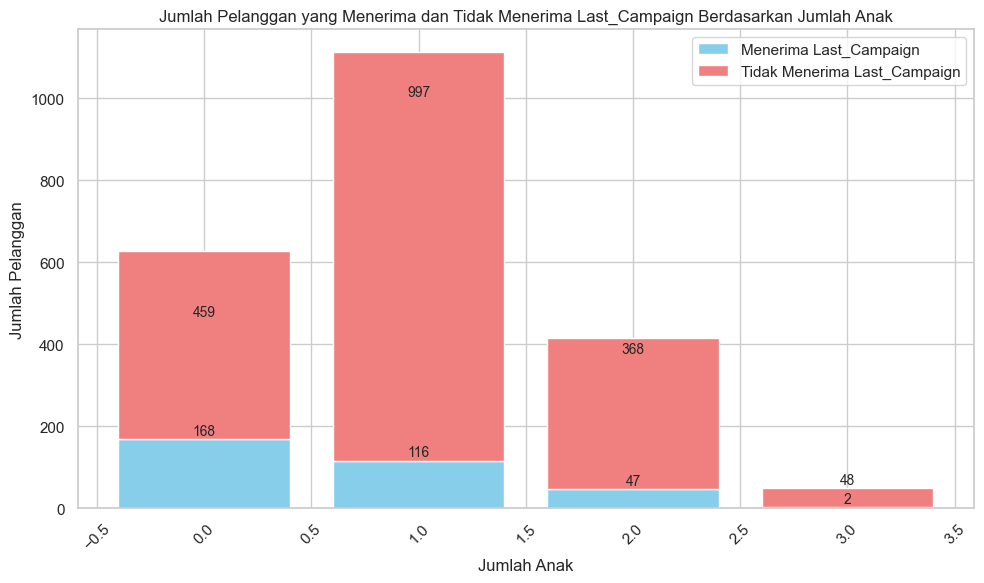

In [325]:
campaign_by_child = meat_buyers.groupby(['Total Children', 'Last Campaign']).size().unstack(fill_value=0)
fig, ax = plt.subplots(figsize=(10, 6))
bar1 = ax.bar(campaign_by_child.index, campaign_by_child[1], label='Menerima Last_Campaign', color='skyblue')
bar2 = ax.bar(campaign_by_child.index, campaign_by_child[0], label='Tidak Menerima Last_Campaign', color='lightcoral', bottom=campaign_by_child[1])
for bars in [bar1, bar2]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{int(height)}', xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3), 
                    textcoords="offset points", ha='center', fontsize=10)
ax.set_xlabel('Jumlah Anak')
ax.set_ylabel('Jumlah Pelanggan')
ax.set_title('Jumlah Pelanggan yang Menerima dan Tidak Menerima Last_Campaign Berdasarkan Jumlah Anak')
ax.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

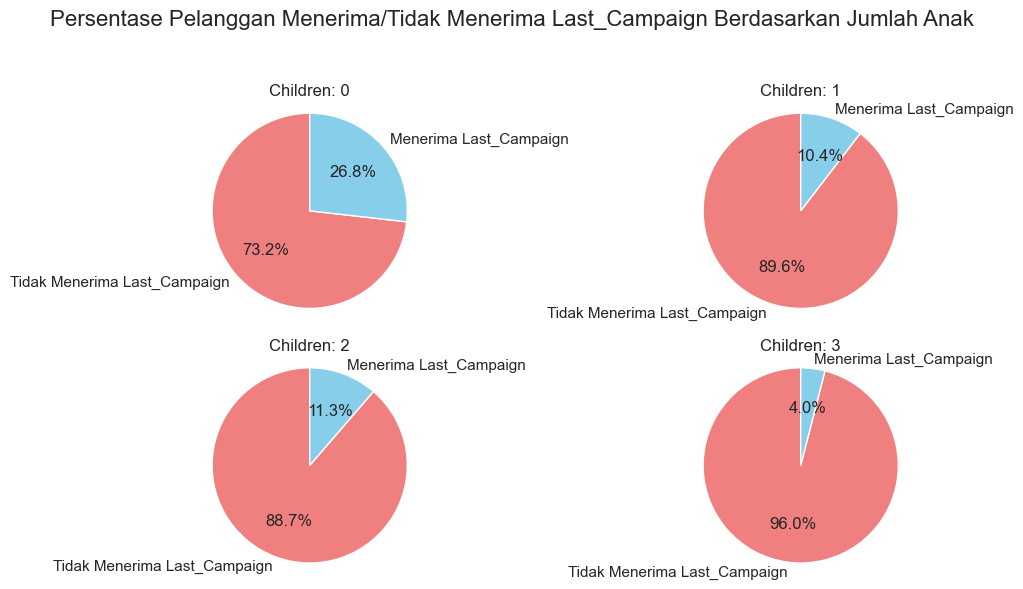

In [326]:
children = campaign_by_child.index
fig, axs = plt.subplots(2, 2, figsize=(10, 6))
fig.suptitle('Persentase Pelanggan Menerima/Tidak Menerima Last_Campaign Berdasarkan Jumlah Anak', fontsize=16)
for i, child in enumerate(children):
    row = i // 2
    col = i % 2
    data = campaign_by_child.loc[child]
    labels = ['Tidak Menerima Last_Campaign', 'Menerima Last_Campaign']
    colors = ['lightcoral', 'skyblue']
    
    axs[row, col].pie(data, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
    axs[row, col].set_title(f'Children: {child}')
    axs[row, col].axis('equal') 

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig('persentase wine vs child accept campaign.png')
plt.show()

Temuan:<tb>

* Jika kita lihat pada bar plot diatas, Pelanggan paling banyak didominasi oleh kalangan yang memiliki `1 anak`, yaitu berjumlah `1113 pelanggan`. Namun dari seluruh pelanggan yang ada, hanya `116 orang` atau `10.4%` saja yang menerima Last_Campaign dan melakukan pembelian pada produk `Meats`.
* Jika kita bandingkan dengan kalangan yang `tidak memiliki anak` yang hanya berjumlah `627 pelanggan`, ada `169 orang` atau `26.8 %` yang menerima Last_Campaign dan melakukan pembelian pada produk `Meats`.
* Sehingga kita perlu melakukan analisa lebih dalam kenapa pada kalangan yang memiliki `1 anak` yang jumlah pasarnya sangat banyak, justu campaign yang dilakukan tidak begitu efektif dibandingkan pada kalangan yang `tidak memiliki anak`.

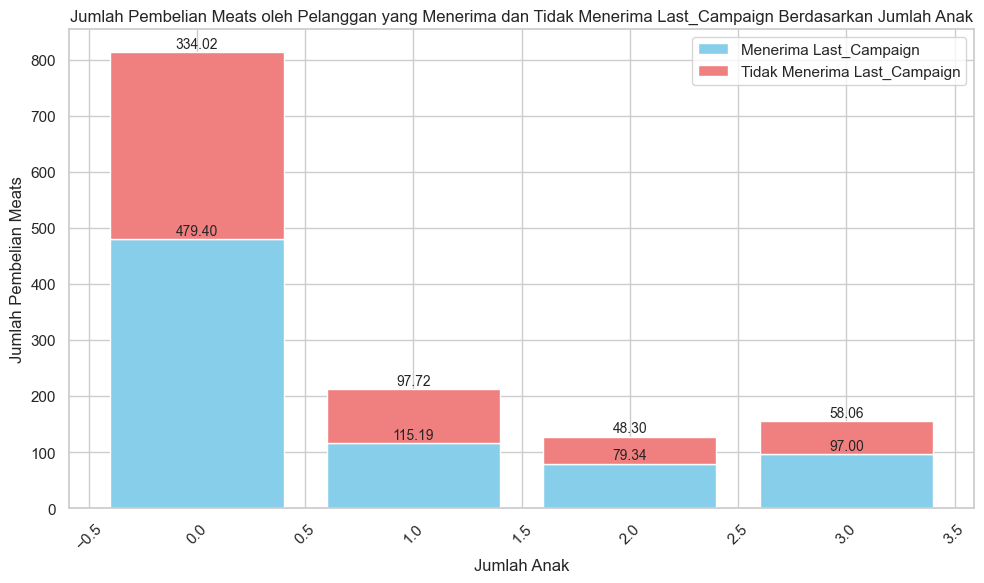

In [327]:
campaign_meats_by_child = df.groupby(['Total Children', 'Last Campaign']).agg({'Meats': 'mean'}).unstack(fill_value=0)
fig, ax = plt.subplots(figsize=(10, 6))
bar1 = ax.bar(campaign_meats_by_child.index, campaign_meats_by_child[('Meats', 1)], label='Menerima Last_Campaign', color='skyblue')
bar2 = ax.bar(campaign_meats_by_child.index, campaign_meats_by_child[('Meats', 0)], label='Tidak Menerima Last_Campaign', color='lightcoral', bottom=campaign_meats_by_child[('Meats', 1)])

for bar, bar2 in zip(bar1, bar2):
    height1 = bar.get_height()
    height2 = bar2.get_height()
    ax.annotate(f'{height1:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height1), xytext=(0, 3), 
                textcoords="offset points", ha='center', fontsize=10)
    ax.annotate(f'{height2:.2f}', xy=(bar2.get_x() + bar2.get_width() / 2, height1 + height2), xytext=(0, 3), 
                textcoords="offset points", ha='center', fontsize=10)

ax.set_xlabel('Jumlah Anak')
ax.set_ylabel('Jumlah Pembelian Meats')
ax.set_title('Jumlah Pembelian Meats oleh Pelanggan yang Menerima dan Tidak Menerima Last_Campaign Berdasarkan Jumlah Anak')
ax.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Temuan:<tb>

Berdasarkan barplot diatas, dapat dilihat bahwa pelanggan yang menerima campaign melakukan rata-rata pembelian lebih banyak dibanding pelanggan yang tidak menerima campaign. Artinya ada potensi yang sangat besar jika Supermarket bisa menargetkan campaign selanjutnya pada pelanggan yang memiliki `1 anak`, karena pelanggan yang memiliki 1 anak memiliki pangsa pasar paling besar namun salah satu yang terendah dalam penerimaan campaign.

#### Terhadap Age Category

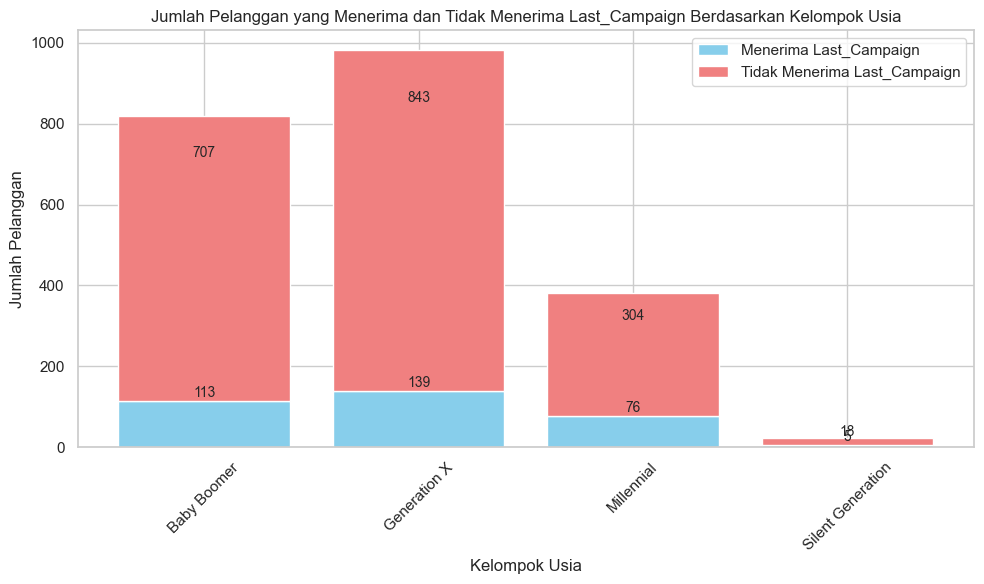

In [328]:
campaign_by_age = meat_buyers.groupby(['Age Category', 'Last Campaign']).size().unstack(fill_value=0)
fig, ax = plt.subplots(figsize=(10, 6))
bar1 = ax.bar(campaign_by_age.index, campaign_by_age[1], label='Menerima Last_Campaign', color='skyblue')
bar2 = ax.bar(campaign_by_age.index, campaign_by_age[0], label='Tidak Menerima Last_Campaign', color='lightcoral', bottom=campaign_by_age[1])
for bars in [bar1, bar2]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{int(height)}', xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3), 
                    textcoords="offset points", ha='center', fontsize=10)
ax.set_xlabel('Kelompok Usia')
ax.set_ylabel('Jumlah Pelanggan')
ax.set_title('Jumlah Pelanggan yang Menerima dan Tidak Menerima Last_Campaign Berdasarkan Kelompok Usia')
ax.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

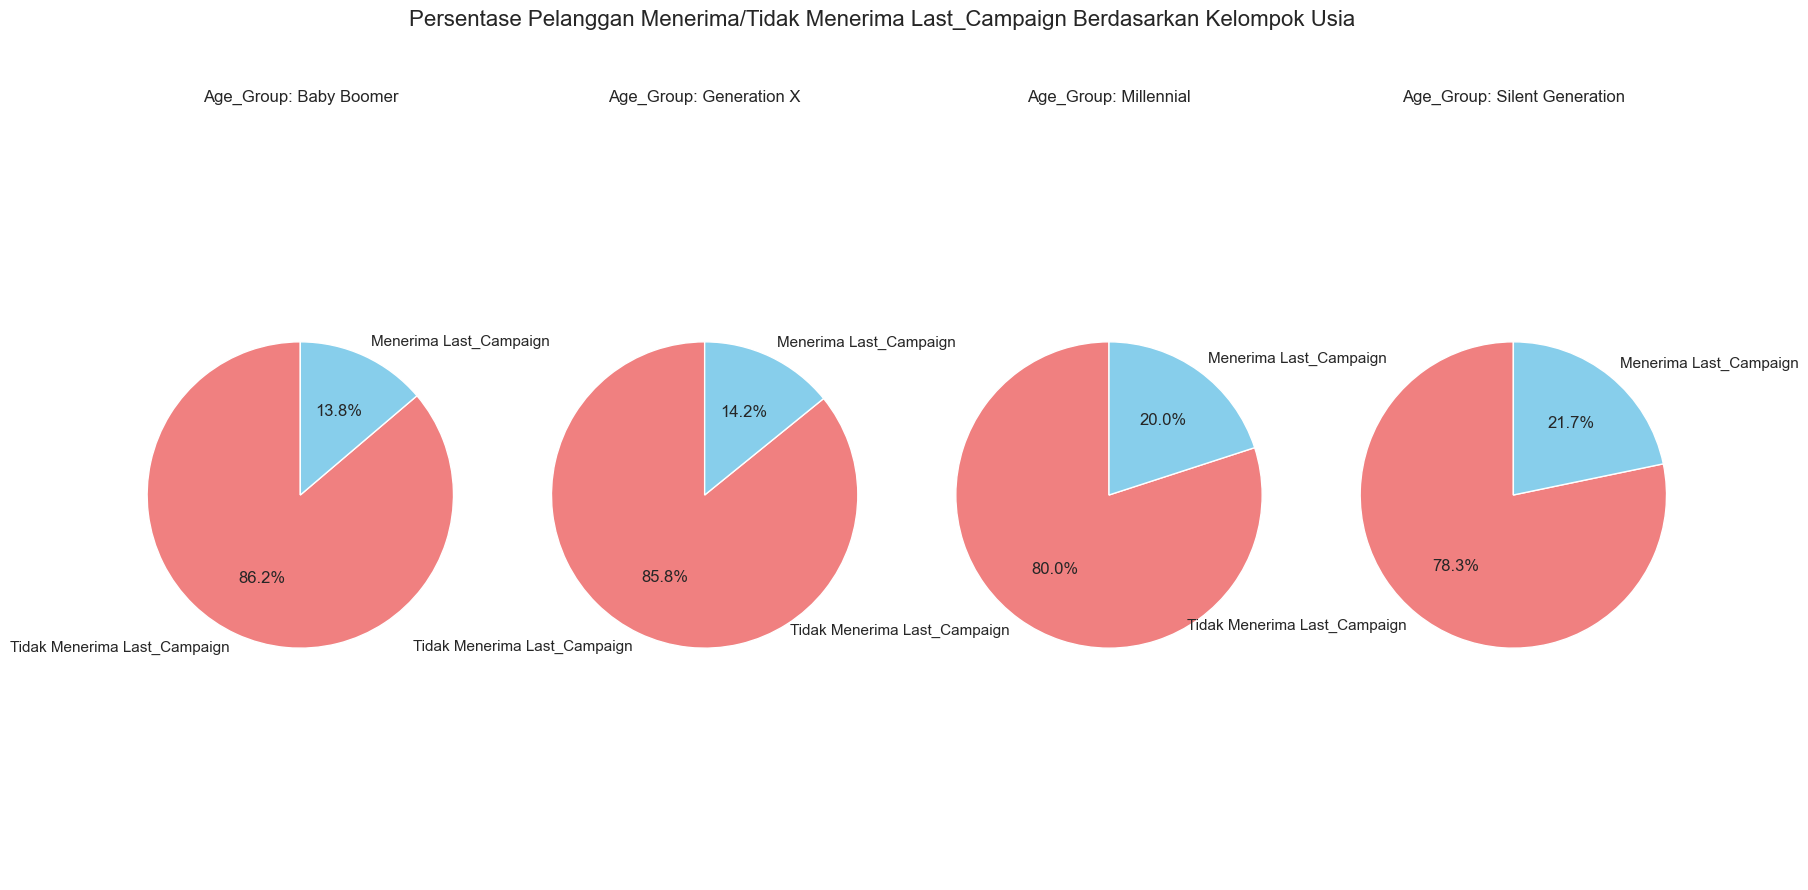

In [329]:
ages = campaign_by_age.index

fig, axs = plt.subplots(1, 4, figsize=(20, 10))
fig.suptitle('Persentase Pelanggan Menerima/Tidak Menerima Last_Campaign Berdasarkan Kelompok Usia', fontsize=16)

for i, age in enumerate(ages):
    data = campaign_by_age.loc[age]
    labels = ['Tidak Menerima Last_Campaign', 'Menerima Last_Campaign']
    colors = ['lightcoral', 'skyblue']

    axs[i].pie(data, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
    axs[i].set_title(f'Age_Group: {age}')
    axs[i].axis('equal')

plt.tight_layout(rect=[4, 1, 1, 0.85])
plt.savefig('rata-rata wine vs usia accept campaign.png')
plt.show()

Temuan:<tb>

* Jika kita lihat pada bar plot diatas, Pelanggan paling banyak didominasi oleh kalangan `Generation X` dengan rentang umur (44-58 tahun), yaitu berjumlah `982 pelanggan`. Namun dari seluruh pelanggan yang ada, hanya `139 orang` atau `14.2%` saja yang menerima Last_Campaign dan melakukan pembelian pada produk `Meats`.
* Jika kita bandingkan dengan kalangan `Millenials` yang hanya berjumlah `380 pelanggan`, ada `76 orang` atau `20 %` yang menerima Last_Campaign dan melakukan pembelian pada produk `Meats`.
* Sehingga kita perlu melakukan analisa lebih dalam kenapa pada kalangan `Generation X` yang jumlah pasarnya sangat banyak, justru campaign yang dilakukan tidak begitu efektif dibandingkan pada kalangan yang `Millenials`.

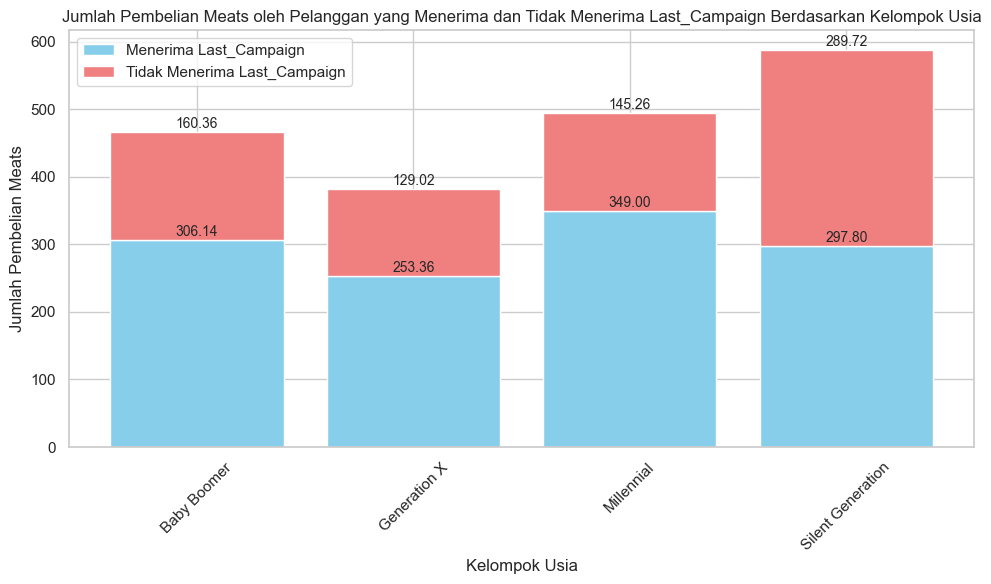

In [330]:
campaign_meats_by_age = df.groupby(['Age Category', 'Last Campaign']).agg({'Meats': 'mean'}).unstack(fill_value=0)
fig, ax = plt.subplots(figsize=(10, 6))
bar1 = ax.bar(campaign_meats_by_age.index, campaign_meats_by_age[('Meats', 1)], label='Menerima Last_Campaign', color='skyblue')
bar2 = ax.bar(campaign_meats_by_age.index, campaign_meats_by_age[('Meats', 0)], label='Tidak Menerima Last_Campaign', color='lightcoral', bottom=campaign_meats_by_age[('Meats', 1)])

for bar, bar2 in zip(bar1, bar2):
    height1 = bar.get_height()
    height2 = bar2.get_height()
    ax.annotate(f'{height1:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height1), xytext=(0, 3), 
                textcoords="offset points", ha='center', fontsize=10)
    ax.annotate(f'{height2:.2f}', xy=(bar2.get_x() + bar2.get_width() / 2, height1 + height2), xytext=(0, 3), 
                textcoords="offset points", ha='center', fontsize=10)

ax.set_xlabel('Kelompok Usia')
ax.set_ylabel('Jumlah Pembelian Meats')
ax.set_title('Jumlah Pembelian Meats oleh Pelanggan yang Menerima dan Tidak Menerima Last_Campaign Berdasarkan Kelompok Usia')
ax.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('persentase wine vs usia accept campaign.png')
plt.show()

Temuan:<tb>

Berdasarkan barplot diatas, dapat dilihat bahwa pelanggan yang menerima campaign melakukan rata-rata pembelian lebih banyak dibanding pelanggan yang tidak menerima campaign. Artinya ada potensi yang sangat besar jika Supermarket bisa menargetkan campaign selanjutnya pada pelanggan `Generation X` dan `Baby Boomer` karena pmemiliki pangsa pasar paling besar namun yang terendah dalam penerimaan campaign dibanding dengan `Millenials` dan `Silent Generation`.

### Analisis Penjualan Meats pada Platform Pembelian

#### Overview 

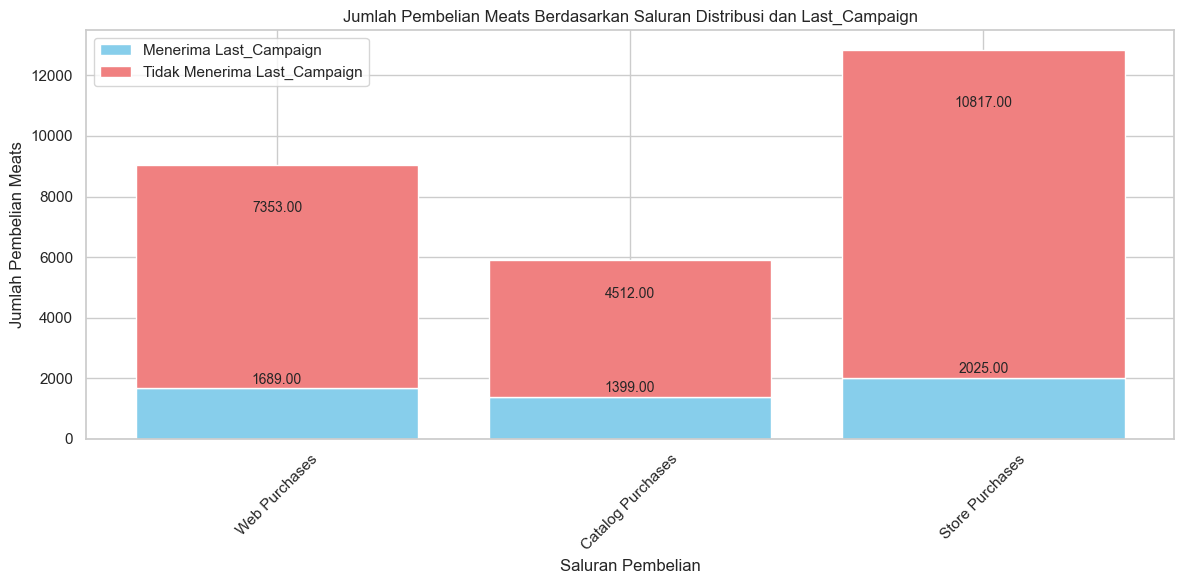

In [331]:
purchase_channels = ['Web Purchases', 'Catalog Purchases', 'Store Purchases']
campaign_meats_by_channel = meat_buyers.groupby(['Last Campaign'])[purchase_channels].sum().T
fig, ax = plt.subplots(figsize=(12, 6))
bar1 = ax.bar(campaign_meats_by_channel.index, campaign_meats_by_channel[1], label='Menerima Last_Campaign', color='skyblue')
bar2 = ax.bar(campaign_meats_by_channel.index, campaign_meats_by_channel[0], label='Tidak Menerima Last_Campaign', color='lightcoral', bottom=campaign_meats_by_channel[1])
for bars in [bar1, bar2]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3), 
                    textcoords="offset points", ha='center', fontsize=10)
ax.set_xlabel('Saluran Pembelian')
ax.set_ylabel('Jumlah Pembelian Meats')
ax.set_title('Jumlah Pembelian Meats Berdasarkan Saluran Distribusi dan Last_Campaign')
ax.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

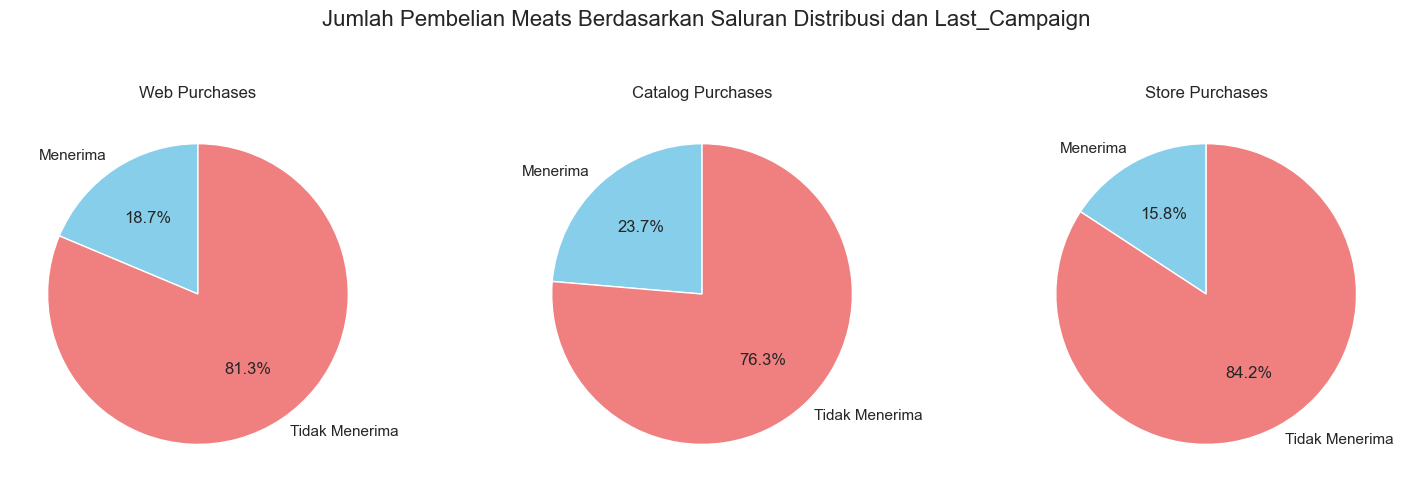

In [332]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
for i, channel in enumerate(purchase_channels):
    campaign1_data = campaign_meats_by_channel.loc[channel, 1]
    campaign0_data = campaign_meats_by_channel.loc[channel, 0]
    labels = ['Menerima', 'Tidak Menerima']
    sizes = [campaign1_data, campaign0_data]
    colors = ['skyblue', 'lightcoral']
    axs[i].pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
    axs[i].set_title(channel)
plt.suptitle('Jumlah Pembelian Meats Berdasarkan Saluran Distribusi dan Last_Campaign', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.9])
plt.savefig('persentase wine vs saluran accept campaign.png')
plt.show()

Temuan:<tb>

* Jika kita lihat pada bar plot diatas, Pelanggan yang menerima last campaign dan membeli produk Meats paling banyak membeli melalui Store. Namun proporsinya sangat kecil jika kita bandingkan dengan pelanggan yang membeli tanpa menerima last campaign yaitu hanya 15.8%. Justru pembelian Meats melalui katalog memiliki proporsi penerimaan last campaign paling besar yaitu 23.7%. Saya berasumsi campaign yang dilakukan lebih terfokus pada katalog produk dibandingkan pada saluran pembelian lainnya.

***

# Kesimpulan dan Rekomendasi

## Kesimpulan

Dari total 2206 data yang telah di analisis, dapat disimpulkan bahwa:
1. Campaign paling banyak diterima oleh pelanggan yaitu `Last Campaign` sebanyak 33,5%.
2. Berdasarkan tingkat `Education`, kalangan `Bachelor` paling banyak mendominasi untuk pembelian Meats dengan total 1111 pelanggan, namun hanya 13,7% yang menerima Last Campaign, angka tersebut lebih sedikit dibanding `PhD` yang menerima Last Campaign sebesar 21,1%
3. Berdasarkan `Marital Status`, pelanggan dengan status `Married` merupakan kalangan paling banyak dengan jumlah 1426 untuk pembelian `Meats`, namun kalangan ini hanya menerima 11,1% Last Campaign yang menjadi penerima terendah diantara yang lain. 
4. Berdasarkan `Income Category`, `Upper-Middle Class` merupakan kalangan yang paling banyak dengan jumlah 1141 pelanggan namun hanya 18% yang menerima Last Campaign bila dibanding dengan `Higher Class` yang menerima 40% tetapi jumlah mereka sangat sedikit yaitu 10 pelanggan.
5. Berdasarkan `Jumlah Anak`, Pelanggan paling banyak didominasi oleh kalangan yang memiliki `1 anak`, yaitu berjumlah `1113 pelanggan`. Namun hanya `116 orang` atau `10.4%` saja yang menerima Last_Campaign dan melakukan pembelian pada produk `Meats`.
6. Berdasarkan `Kategori Umur`, Pelanggan paling banyak didominasi oleh kalangan `Generation X` dengan rentang umur (44-58 tahun), yaitu berjumlah `982 pelanggan`. Namun dari seluruh pelanggan yang ada, hanya `139 orang` atau `14.2%` saja yang menerima Last_Campaign.
7. Platform yang paling banyak digunakan untuk pembelian `Meats` ada pada Store Purchases dengan jumlah 12.842 namun hanyua 2025 pelanggan yang menerima Last Campaign atau 15,7% pembelian melalui Store Purchases yang menerima Last Campaign

## Rekomendasi

Berdasarkan hasil analisi, rekomendasi yang dapat diberikan yaiitu.
1. Pelanggan dari kalangan PhD, Single, Higher atau Upper Middle Class, tidak memiliki anak,, Silent Generation (79 tahun ke atas) atau Millenial (27-43 tahun) dan melakukan pembelian Meats dari Catalog Purchases adalah kelompok yang perlu dipertahankan karna memiliki respon yang baik terhadap penjualan sebagai penerima Last Campaign tertinggi.
2. Pelanggan dari kalangan Bachelor, Generation X (44-58 tahun), memiliki 1 anak, Upper Middle Class, Married, melakukan pembelian melalui Store Purchases, merupakan kalangan yang perlu diperhatikan lebih banyak sebagai target campaign selanjutnya karena pangsa pasar yang tinggi tetapi penerimaan Last Campaign nya cenderung sedikit. Sehingga ada potensi besar untuk meningkatkan penjualan Meats bila mampu meningkatkan penerimaan Campaign pada kalangan tersebut.
3. Tim Marketing perlu mempelajari lebih lanjut terkait dengan kualitas Campaign yang diberikan dengan melakukan pendekatan lain seperti menggunakan SEO, Ads, dan lainnya.

## Asumsi Peningkatan Target Campaign

### Bachelor
bila diasumsikan kenaikan penerima campaign kalangan Bachelor sama dengan PhD pada Last Campaign dari 13,7% menjadi 21,1% dari total 1111 pelanggan. Maka:

In [333]:
current_campaign = (13.7/100) * 1111
next_campaign = (21.1/100)*1111
addition_received = next_campaign - current_campaign
print(f'Pada Next Campaign, target pelanggan dari kalangan Bachelor adalah {next_campaign:.0f} dengan asumsi {addition_received:.0f} lebih banyak di banding Last Campaign')

Pada Next Campaign, target pelanggan dari kalangan Bachelor adalah 234 dengan asumsi 82 lebih banyak di banding Last Campaign


### Married
Bila diasumsikan kenaikan penerima campaign kalangan Married sama dengan Single dari 11,1% ke 22,9% dari total 1426 pelanggan. Maka:

In [334]:
current_campaign = (11.1/100) * 1426
next_campaign = (22.9/100)*1426
addition_received = next_campaign - current_campaign
print(f'Pada Next Campaign, target pelanggan dari kalangan Married adalah {next_campaign:.0f} dengan asumsi {addition_received:.0f} lebih banyak di banding Last Campaign')

Pada Next Campaign, target pelanggan dari kalangan Married adalah 327 dengan asumsi 168 lebih banyak di banding Last Campaign


### Upper-Middle Class
Bila diasumsikan kenaikan penerima campaign kalangan Upper-Middle Class sama dengan Higher Class dari 18% ke 40% dari total 1141 pelanggan. Maka:

In [335]:
current_campaign = (18/100) * 1141
next_campaign = (40/100)*1141
addition_received = next_campaign - current_campaign
print(f'Pada Next Campaign, target pelanggan dari kalangan Upper-Middle adalah {next_campaign:.0f} dengan asumsi {addition_received:.0f} lebih banyak di banding Last Campaign')

Pada Next Campaign, target pelanggan dari kalangan Upper-Middle adalah 456 dengan asumsi 251 lebih banyak di banding Last Campaign


### Anak 1
Bila diasumsikan kenaikan penerima campaign pada kalangan pelanggan dengan jumlah anak 1 sama dengan jumlah anak 0 dari 10,4% ke 26,8% dari total 1113 pelanggan. Maka:

In [336]:
current_campaign = (10.4/100) * 1113
next_campaign = (26.8/100)*1113
addition_received = next_campaign - current_campaign
print(f'Pada Next Campaign, target pelanggan dari kalangan pelanggan dengan jumlah anak 1 \nadalah {next_campaign:.0f} dengan asumsi {addition_received:.0f} lebih banyak di banding Last Campaign')

Pada Next Campaign, target pelanggan dari kalangan pelanggan dengan jumlah anak 1 
adalah 298 dengan asumsi 183 lebih banyak di banding Last Campaign


### Generation X
Bila diasumsikan kenaikan penerima campaign kalangan Generation X sama dengan Millenials dari 14.2% ke 20% dari total 982 pelanggan. Maka:

In [337]:
current_campaign = (14.2/100) * 982
next_campaign = (20/100)*982
addition_received = next_campaign - current_campaign
print(f'Pada Next Campaign, target pelanggan dari kalangan pelanggan dengan rentang usia pada Generation X (44-58 tahun)\nadalah {next_campaign:.0f} dengan asumsi {addition_received:.0f} lebih banyak di banding Last Campaign')

Pada Next Campaign, target pelanggan dari kalangan pelanggan dengan rentang usia pada Generation X (44-58 tahun)
adalah 196 dengan asumsi 57 lebih banyak di banding Last Campaign


## Asumsi Penjualan Meats pada Next Campaign

In [338]:
display(campaign_meats_by_education,
campaign_meats_by_age,
campaign_meats_by_income,
campaign_meats_by_marital,
campaign_meats_by_child)

Meats            
Last Campaign           0           1
Education                            
Bachelor       158.473410  324.467105
High School     11.442308   11.500000
Master         129.647423  302.435897
PhD            149.037135  246.455446

Meats            
Last Campaign               0           1
Age Category                             
Baby Boomer        160.355021  306.141593
Generation X       129.017773  253.359712
Millennial         145.263158  349.000000
Silent Generation  289.722222  297.800000

Meats            
Last Campaign                0           1
Income Category                           
Higher Class        826.166667  197.000000
Lower Class          22.665094   16.923077
Lower-Middle Class   33.517385   69.683673
Upper-Middle Class  254.034188  437.887805

Meats            
Last Campaign            0           1
Marital_Status                        
Divorced        125.663866  288.060606
Married         148.795741  278.518987
Single          144.566757  319.321101

Meats            
Last Campaign            0           1
Total Children                        
0               334.021739  479.398810
1                97.719157  115.189655
2                48.298913   79.340426
3                58.062500   97.000000

Berdasarkan analisis yang telah dilakukan, rata-rata pembelian produk Meats pada pelanggan yang menerima last campaign yaitu:
* Bachelor : 324.5
* Married : 278.5
* Upper-Middle Class : 437.8
* 1 anak : 115.18
* Generation X : 253.4 


In [339]:
print(f"Sehingga kita bisa asumsikan penjualan Meats untuk kalangan \nBachelor, Married, Upper-Middle Class, 1 anak dan Generation X adalah:\n"
      f" Bachelor : {324.5 * 234:.0f}\n"
      f" Married : {278.5 * 327:.0f}\n"
      f" Upper-Middle Class : {437.8 * 456:.0f}\n"
      f" 1 anak : {115.18 * 298:.0f}\n"
      f" Generation X : {253.4 * 196:.0f}")


Sehingga kita bisa asumsikan penjualan Meats untuk kalangan 
Bachelor, Married, Upper-Middle Class, 1 anak dan Generation X adalah:
 Bachelor : 75933
 Married : 91070
 Upper-Middle Class : 199637
 1 anak : 34324
 Generation X : 49666
